# Final Project Submission

Please fill out:
* Student name: Austin Towery
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. The goal of this analysis is to explore what factors can contribute to success or failure when making movies. Using that analysis I will translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what movies to create.

## Setup

In [452]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import os,glob
import string

In [453]:
# Create folder for data files
folder = 'zippedData/'

# code by James Irving, retrieved 09/14/2021
# Source: https://youtu.be/rufvTgBEYN8?list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&t=1336

In [454]:
# use os to list files in folder
os.listdir(folder)

# code by James Irving, retrieved 09/14/2021
# Source: https://youtu.be/rufvTgBEYN8?list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&t=1336

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [455]:
# Glob is creating a search string that searches in folder for any file type 
# That starts with csv but can have anything after

files = glob.glob(f"{folder}*.csv*")
files

# code by James Irving, retrieved 09/14/2021
# Source: https://youtu.be/rufvTgBEYN8?list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&t=1336

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [456]:
# Make file names more variable friendly
# Take file name, replace .csv.gz, split it along slashes, then take the last
# Item after split and swap '.' for '_'

files[0].replace('zippedData\\','').replace('.csv.gz','').split(
                                        '/')[-1].replace('.','_')


# code by James Irving, retrieved 09/14/2021
# Source: https://youtu.be/rufvTgBEYN8?list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&t=1336

'bom_movie_gross'

In [457]:
#Load files into dict using filename as their key

tables = {}
dashes = '---'*25

for file in files:
    # Save a variable-friendly version of file name
    table_name = file.replace('zippedData\\',''
                             ).replace('.csv.gz',''
                             ).split('/')[-1].replace('.','_')
    print(dashes)
    
    # Load and preview dataframe
    print(f'Preview of {table_name}')
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()
    
    
# code by James Irving, retrieved 09/14/2021
# Source: https://youtu.be/rufvTgBEYN8?list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&t=1336

---------------------------------------------------------------------------
Preview of bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



---------------------------------------------------------------------------
Preview of imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



---------------------------------------------------------------------------
Preview of imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



---------------------------------------------------------------------------
Preview of imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



---------------------------------------------------------------------------
Preview of imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



---------------------------------------------------------------------------
Preview of imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"



---------------------------------------------------------------------------
Preview of imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



---------------------------------------------------------------------------
Preview of tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



---------------------------------------------------------------------------
Preview of tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Possible Approaches

* Using the provided csv's and merging dataframes with:
    * regular pandas
    * pandasql
* Using the provided csv's and creating your own SQL database (using sqlite)
* Sourcing your own dataset using Web Scraping
* Sourcing your own dataset using an API
* Using 1 of the provided csv's and supplementing it with addtional data from an API

### If I'm feeling behind

* Focus on these three tables
    * imdb.title.basics
    * imdb.title.ratings
    * bom.movie_gross

### Using the Provided Data - Join with Pandas

* **Questions to Consider:**
    1. Where is the financial data?
    2. What columns are primary keys/unique indices?
    3. What tables could I join on what columns?

## Questions I want to Answer

1. What are the 3 genres with the highest return on investment and what are the 3 lowest?
2. Does runtime effect the success of a movie?
3. What is the correlation between consumer ratings on a movie's financial success?

## Data Preparation and Cleaning

### Data Preperation

In [458]:
# create dataframe for each new dataset used and preview them with the ones
# made previously

df_imdb_title_basics = tables['imdb_title_basics']
print('***IMDB_TITLE_BASICS DATASET***')
display(df_imdb_title_basics.head())

print(dashes)

df_tn_movie_budgets = tables['tn_movie_budgets']
print('***TN_MOVIE_BUDGETS DATASET***')
display(df_tn_movie_budgets.head())

print(dashes)

df_bom_movie_gross = tables['bom_movie_gross']
print('***BOM_MOVIE_GROSS DATASET***')
display(df_bom_movie_gross.head())

print(dashes)

df_tmdb_movies = tables['tmdb_movies']
print('***TMDB_MOVIES DATASET***')
display(df_tmdb_movies.head())

print(dashes)

df_imdb_title_ratings = tables['imdb_title_ratings']
print('***IMDB_TITLE_RATINGS DATASET***')
display(df_imdb_title_ratings.head())

***IMDB_TITLE_BASICS DATASET***


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


---------------------------------------------------------------------------
***TN_MOVIE_BUDGETS DATASET***


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


---------------------------------------------------------------------------
***BOM_MOVIE_GROSS DATASET***


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


---------------------------------------------------------------------------
***TMDB_MOVIES DATASET***


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


---------------------------------------------------------------------------
***IMDB_TITLE_RATINGS DATASET***


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [459]:
# print('***TN_MOVIE_BUDGETS DATASET***')
# display(df_tn_movie_budgets.info())
# print(dashes)
# print('***BOM_MOVIE_GROSS DATASET***')
# display(df_bom_movie_gross.info())
# print(dashes)
# print('***TMDB_MOVIES DATASET***')
# display(df_tmdb_movies.info())
# print(dashes)
# print('***IMDB_TITLE_RATINGS DATASET***')
# display(df_imdb_title_ratings.info())

In [460]:
# print out an quick overview of the table options to see what to explore
for key in tables.keys():
    print(key)

bom_movie_gross
imdb_name_basics
imdb_title_akas
imdb_title_basics
imdb_title_crew
imdb_title_principals
imdb_title_ratings
tmdb_movies
tn_movie_budgets


>From the preview above it looks like `imdb_title_basics`, `tn_movie_budgets`, and `bom_movie gross` all have relevant information about grosses and genres associated with movies.

>Next step is to investigate each dataset further to see the best way to use them.

In [461]:
# display preview of information about each datasets' values
print(df_bom_movie_gross.info())
print('\n')
print(dashes)
print(df_imdb_title_basics.info())
print('\n')
print(dashes)
print(df_tn_movie_budgets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  f

>There are quite a lot more entries in `imdb's` movie title database.  `bom's` dataset is much smaller than `tn's` and there are also a lot of missing values in it.

>`imdb's` and `tn's` datasets seem like a good place to start.

In [462]:
# redisplay the tables to be merged
print('***TN_MOVIE_BUDGET DATASET***')
display(df_tn_movie_budgets.head())

print('***IMDB_TITLE_BASICS DATASET***')
display(df_imdb_title_basics.head())

***TN_MOVIE_BUDGET DATASET***


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


***IMDB_TITLE_BASICS DATASET***


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### Functions Section

#### IMDB Title List Cleaning

In [463]:
# create lists for each datasets movie title column as lower case and preview

# create list of tn's movie title column as lower case
tn_title_list = []
for title in df_tn_movie_budgets['movie']:
    tn_title_list.append(title.lower())

# create list of imdb's primary title column as lower case
imdb_primary_title_list = []
for title in df_imdb_title_basics['primary_title']:
    imdb_primary_title_list.append(title.lower())
    
# create list of imdb's original title column as lower case
imdb_original_title_list = []
for title in df_imdb_title_basics['original_title']:
    imdb_original_title_list.append(str(title).lower())

# preview first five titles in each list
print(tn_title_list[:5])
print(imdb_primary_title_list[:5])
print(imdb_original_title_list[:5])

['avatar', 'pirates of the caribbean: on stranger tides', 'dark phoenix', 'avengers: age of ultron', 'star wars ep. viii: the last jedi']
['sunghursh', 'one day before the rainy season', 'the other side of the wind', 'sabse bada sukh', 'the wandering soap opera']
['sunghursh', 'ashad ka ek din', 'the other side of the wind', 'sabse bada sukh', 'la telenovela errante']


In [464]:
def clean_title(text):
    import string
    # remove punctuation
    for p in string.punctuation:
        text = text.replace(p,'')
    
    # remove extra spaces, make lower case, creat list of each word in string
    text_list = text.strip().lower().split()
    # join each word in text_list together with a space in between to remake string
    new_text = ' '.join(text_list)
    
    # return new list
    return new_text

In [465]:
def clean_and_split(text):
    import string
    # remove punctuation and extra spaces, make all letter lower case,
    # and split title into list
    for p in string.punctuation:
        text = text.replace(p,'')
    text_list = text.strip().lower().split()
    # return new list
    return text_list

In [466]:
# create function to compare a list of titles to both title comlumns in imdb's dataset

def imdb_title_comparison(title_list):
    # create dictionary to return and lists that it will contain
    t_dict = {}
    t_not_found = []
    t_in_pt = []
    t_in_ot = []

    # check each title in title_list passed to function column to see if it 
    # matches one of the title columns in imdb's dataset
    for title in title_list:
        # check if title is in primary or original title list, if so add it to respective list
        c_title = clean_title(title)
        if title.lower() in imdb_primary_title_list:
            t_in_pt.append(title.lower())
        elif title.lower() in imdb_original_title_list:
            t_in_ot.append(title.lower())
        # if not found in either add title to list of ones not found
        else:
            t_not_found.append(title.lower())
    
    # add to dict that will return all three lists
    t_dict['not_found'] = t_not_found
    t_dict['pt_titles'] = t_in_pt
    t_dict['ot_titles'] = t_in_ot
    
    # print length of each list and a preview of titles for each
    print('Primary titles found:')
    print(f'{len(t_in_pt)} titles found in primary titles')
    print(t_in_pt[:10],'\n')

    print('Original titles found:')
    print(f'{len(t_in_ot)} titles found in original titles')
    print(t_in_ot[:10],'\n')

    print('Titles not found in either:')   
    print(f'{len(t_not_found)} titles not found in either column')
    print(t_not_found[:10],'\n')
    
    # print out keys for t_dict
    print('t_dict keys: not_found, pt_titles, ot_titles')
    
    return t_dict

In [ ]:
# # create function to compare a list of titles to both title comlumns in imdb's dataset
# def imdb_title_not_found(title_list):
#     # create list to hold the titles not found for further review
#     not_found = []

#     # check each title in title_list to see if it matches one of the titles 
#     # in either of imdb_title_basics columns  dataset
#     for title in title_list:
#         # clean title with clean_title function
#         c_title = clean_title(title)
        
#         # if not found in either imdb title lists add title to list to not found
#         if title.lower() not in df_imdb_title_basics['primary_title']:
#             if title.lower() not in df_imdb_title_basics['original_title']:
#                 not_found.append(title.lower())
    
#     return not_found

In [467]:
# run function on tn_title_list
tn_title_comparison = imdb_title_comparison(tn_title_list)

# unpack dictionary values into individual lists to work with
titles_not_found = tn_title_comparison['not_found']
titles_in_pt = tn_title_comparison['pt_titles']
titles_in_ot = tn_title_comparison['ot_titles']

Primary titles found:
2432 titles found in primary titles
['avatar', 'pirates of the caribbean: on stranger tides', 'dark phoenix', 'avengers: age of ultron', 'avengers: infinity war', 'justice league', 'spectre', 'the dark knight rises', 'solo: a star wars story', 'the lone ranger'] 

Original titles found:
57 titles found in original titles
['renegades', 'tian jiang xiong shi', 'maze runner: the death cure', 'mei ren yu', 'zhuo yao ji', 'yi dai zong shi', 'switchback', 'yip man 3', 'nanny mcphee and the big bang', 'konferenz der tiere'] 

Titles not found in either:
3293 titles not found in either column
['star wars ep. viii: the last jedi', 'star wars ep. vii: the force awakens', 'pirates of the caribbean: at worldâ\x80\x99s end', 'spider-man 3', 'harry potter and the half-blood prince', 'superman returns', 'quantum of solace', 'pirates of the caribbean: dead manâ\x80\x99s chest', 'the chronicles of narnia: prince caspian', 'transformers: revenge of the fallen'] 

t_dict keys: not_f

>It looks like some of the titles from `tn's_movie_budgets` didn't get imported cleanly from the **\x80\x90s** in the pirates at world's end title as well as the other pirates title.

>The other titles not found seem to be sequels who's numbering or naming convention could be causing an issue. 

>First I will look at the titles containing extra characters.

#### Artifact Text Cleaning

In [468]:
# make a list of all titles containing text artifact
misread_titles = []
for title in titles_not_found:
    if "â" in title:
        misread_titles.append(title)

# preview how many total titles there are with this artifact
print(f'There are {len(misread_titles)} misread titles\n')
# preview first 10 and last 10 to see if the unwanted text is the same
first_ten = misread_titles[:10]
print(first_ten)
print('\n')
last_ten = misread_titles[-10:]
print(last_ten)

There are 73 misread titles

['pirates of the caribbean: at worldâ\x80\x99s end', 'pirates of the caribbean: dead manâ\x80\x99s chest', 'disneyâ\x80\x99s a christmas carol', 'mission: impossibleâ\x80\x94fallout', 'mission: impossibleâ\x80\x94rogue nation', 'mission: impossibleâ\x80\x94ghost protocol', 'harry potter and the sorcererâ\x80\x99s stone', 'assassinâ\x80\x99s creed', 'the huntsman: winterâ\x80\x99s war', 'miss peregrineâ\x80\x99s home for peculiar children']


['donâ\x80\x99t think twice', '2016: obamaâ\x80\x99s america', 'the legend of hellâ\x80\x99s gate: an american conspiracy', 'beginnerâ\x80\x99s guide to sex', 'the kingâ\x80\x99s thief', 'iâ\x80\x99m not ashamed', 'godâ\x80\x99s not dead', 'the helixâ\x80¦loaded', 'antarctic edge: 70âº south', "i love you â\x80¦ don't touch me!"]


In [469]:
# create function for checking list for any unfixed titles
def check_misread_titles(title_list):
    misread_titles = []
    # create list of misread_titles
    for title in title_list:
        if 'â' in title:
            misread_titles.append(title)
    
    # preview how many total titles there are with this artifact
    print(f'There are {len(misread_titles)} misread titles\n')
    # preview any misread titles left
    print(misread_titles)
    
    return misread_titles

>Looks like there are multiple versions of the unwanted text.  Next I will get a list of each unwanted text variant then replace them.

In [470]:
# create unique set of artifact variants
unwanted_text_variants = []

for title in misread_titles:
    # partition title at beginning of artifact text
    part_title = title.partition('â')
    
    # split last element of partition and select the first element
    split_part = part_title[-1].split()[0]
    
    # add 'â' back to artifact and append to unwanted variants list
    artifact = 'â' + split_part
    unwanted_text_variants.append(artifact)
    
unwanted_set = set(unwanted_text_variants)
unwanted_set

{'â\x80\x93',
 'â\x80\x94',
 'â\x80\x94fallout',
 'â\x80\x94ghost',
 'â\x80\x94rogue',
 'â\x80\x99',
 'â\x80\x99amore',
 'â\x80\x99m',
 'â\x80\x99os',
 'â\x80\x99s',
 'â\x80\x99t',
 'â\x80¦',
 'â\x80¦loaded',
 'âº',
 'â½:'}

In [471]:
# create list of artifacts that mean seperate things
misc_artifacts = []
for title in misread_titles:
    if 'â\x80¦' in title:
        misc_artifacts.append(title)
    
misc_artifacts

['when harry met sallyâ\x80¦',
 '28 days laterâ\x80¦',
 'the helixâ\x80¦loaded',
 "i love you â\x80¦ don't touch me!"]

In [472]:
# create function for making list of misc artifacts
def artifact_list(title_list):
    misc_artifacts = []
    for title in misread_titles:
        if 'â\x80¦' in title:
            misc_artifacts.append(title)
    
    return misc_artifacts

In [473]:
# check if any misc titles are actually in imdb's list

for title in imdb_primary_title_list:
    if 'when harry met sally' in title:
        print(title)
    elif '28 days later' in title:
        print(title)
    elif 'the helix' in title:
        print(title)
    elif 'touch me!' in title:
        print(title)

print('\n' + dashes + '\n')

for title in imdb_original_title_list:
    if 'when harry met sally' in title:
        print(title)
    elif '28 days later' in title:
        print(title)
    elif 'the helix' in title:
        print(title)
    elif 'touch me!' in title:
        print(title)


---------------------------------------------------------------------------



>These titles have various symbols causing the `'¦'` vertical broken bar.  Since they don't appear to be in the `imdb` title list anyway we can just ignore them.

In [474]:
def replace_artifact(text):
    if 'â\x80\x93' in text:
        text = text.replace('â\x80\x93', "-")   
    elif 'â\x80\x94' in text:
        text = text.replace('â\x80\x94', "-")
    elif 'â\x80\x99' in text:
        text = text.replace('â\x80\x99', "'") 
    elif 'âº' in text:
        text = text.replace('âº', '')
    elif 'â½' in text:
        text = text.replace('â½', '') 
    return text

In [475]:
def fix_artifact_titles(title_list):
    
    fixed_titles = []
    misc_artifacts = artifact_list(title_list)
    
    for title in title_list:
        if 'â' in title:
            if title in misc_artifacts:
                fixed_titles.append(title)
            else:
                rep_title = replace_artifact(title)
                fixed_titles.append(rep_title)
        else:
            fixed_titles.append(title)
    
    # check fixed list for any 
    check_misread_titles(fixed_titles)
    
    return fixed_titles

In [476]:
fixed_titles_not_found = fix_artifact_titles(titles_not_found)
fixed_titles_not_found

There are 4 misread titles

['when harry met sallyâ\x80¦', '28 days laterâ\x80¦', 'the helixâ\x80¦loaded', "i love you â\x80¦ don't touch me!"]


['star wars ep. viii: the last jedi',
 'star wars ep. vii: the force awakens',
 "pirates of the caribbean: at world's end",
 'spider-man 3',
 'harry potter and the half-blood prince',
 'superman returns',
 'quantum of solace',
 "pirates of the caribbean: dead man's chest",
 'the chronicles of narnia: prince caspian',
 'transformers: revenge of the fallen',
 'x-men: the last stand',
 'the golden compass',
 'guardians of the galaxy vol 2',
 'spider-man 2',
 '2012',
 'terminator salvation',
 'prince of persia: sands of time',
 "disney's a christmas carol",
 'the dark knight',
 'indiana jones and the kingdom of the crystal skull',
 'the chronicles of narnia: the lion, the witch and the wardrobe',
 'wall-e',
 'rush hour 3',
 'mission: impossible-fallout',
 'up',
 'monsters vs. aliens',
 'g.i. joe: the rise of cobra',
 'wild wild west',
 'the mummy: tomb of the dragon emperor',
 'evan almighty',
 'waterworld',
 'the polar express',
 'terminator 3: rise of the machines',
 'van helsing',
 'cow

In [477]:
imdb_title_comparison(fixed_titles_not_found)

Primary titles found:
35 titles found in primary titles
["assassin's creed", "the huntsman: winter's war", "miss peregrine's home for peculiar children", "it's complicated", "legends of oz: dorothy's return", "pete's dragon", "a dog's way home", "winter's tale", "daddy's home", "the girl in the spider's web"] 

Original titles found:
3 titles found in original titles
["tyler perry's boo 2! a madea halloween", "de rouille et d'os", "beginner's guide to sex"] 

Titles not found in either:
3255 titles not found in either column
['star wars ep. viii: the last jedi', 'star wars ep. vii: the force awakens', "pirates of the caribbean: at world's end", 'spider-man 3', 'harry potter and the half-blood prince', 'superman returns', 'quantum of solace', "pirates of the caribbean: dead man's chest", 'the chronicles of narnia: prince caspian', 'transformers: revenge of the fallen'] 

t_dict keys: not_found, pt_titles, ot_titles


{'not_found': ['star wars ep. viii: the last jedi',
  'star wars ep. vii: the force awakens',
  "pirates of the caribbean: at world's end",
  'spider-man 3',
  'harry potter and the half-blood prince',
  'superman returns',
  'quantum of solace',
  "pirates of the caribbean: dead man's chest",
  'the chronicles of narnia: prince caspian',
  'transformers: revenge of the fallen',
  'x-men: the last stand',
  'the golden compass',
  'guardians of the galaxy vol 2',
  'spider-man 2',
  '2012',
  'terminator salvation',
  'prince of persia: sands of time',
  "disney's a christmas carol",
  'the dark knight',
  'indiana jones and the kingdom of the crystal skull',
  'the chronicles of narnia: the lion, the witch and the wardrobe',
  'wall-e',
  'rush hour 3',
  'mission: impossible-fallout',
  'up',
  'monsters vs. aliens',
  'g.i. joe: the rise of cobra',
  'wild wild west',
  'the mummy: tomb of the dragon emperor',
  'evan almighty',
  'waterworld',
  'the polar express',
  'terminator 3

>Looks like there are still 3521 titles that couldn't be found

In [478]:
pc_tn_title_list = fix_artifact_titles(tn_title_list)

There are 4 misread titles

['when harry met sallyâ\x80¦', '28 days laterâ\x80¦', 'the helixâ\x80¦loaded', "i love you â\x80¦ don't touch me!"]


In [479]:
# make new tn dataframe with partially clean movie titles
df_tn_movie_budgets['movie'] = pc_tn_title_list
df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [480]:
tn_cleaned = []

for title in pc_tn_title_list:
    c_title = clean_title(title)
    tn_cleaned.append(c_title)

imdb_primary_cleaned = []

for title in imdb_primary_title_list:
    c_title = clean_title(title)
    imdb_primary_cleaned.append(c_title)
    
imdb_original_cleaned = []

for title in imdb_original_title_list:
    c_title = clean_title(title)
    imdb_original_cleaned.append(c_title)
    


In [481]:
def imdb_cleaned_title_comparison(title_list):
    # create dictionary to return and lists that it will contain
    t_dict = {}
    t_not_found = []
    t_in_pt = []
    t_in_ot = []

    # check each title in title_list passed to function column to see if it 
    # matches one of the title columns in imdb's dataset
    for title in title_list:
        # check if title is in primary or original title list, if so add it to respective list
        c_title = clean_title(title)
        if c_title in imdb_primary_cleaned:
            t_in_pt.append(title.lower())
        elif c_title in imdb_original_cleaned:
            t_in_ot.append(title.lower())
        # if not found in either add title to list of ones not found
        else:
            t_not_found.append(c_title)
    
    # add to dict that will return all three lists
    t_dict['not_found'] = t_not_found
    t_dict['pt_titles'] = t_in_pt
    t_dict['ot_titles'] = t_in_ot
    
    # print length of each list and a preview of titles for each
    print('Primary titles found:')
    print(f'{len(t_in_pt)} titles found in primary titles')
    print(t_in_pt[:10],'\n')

    print('Original titles found:')
    print(f'{len(t_in_ot)} titles found in original titles')
    print(t_in_ot[:10],'\n')

    print('Titles not found in either:')   
    print(f'{len(t_not_found)} titles not found in either column')
    print(t_not_found[:10],'\n')
    
    # print out keys for t_dict
    print('t_dict keys: not_found, pt_titles, ot_titles')
    
    return t_dict

In [482]:
tn_cleaned_dict = imdb_cleaned_title_comparison(tn_cleaned)
tn_cleaned_nf = tn_cleaned_dict['not_found']

Primary titles found:
2512 titles found in primary titles
['avatar', 'pirates of the caribbean on stranger tides', 'dark phoenix', 'avengers age of ultron', 'avengers infinity war', 'justice league', 'spectre', 'the dark knight rises', 'solo a star wars story', 'the lone ranger'] 

Original titles found:
62 titles found in original titles
['renegades', 'tian jiang xiong shi', 'maze runner the death cure', 'mei ren yu', 'zhuo yao ji', 'yi dai zong shi', 'switchback', 'yip man 3', 'nanny mcphee and the big bang', 'konferenz der tiere'] 

Titles not found in either:
3208 titles not found in either column
['star wars ep viii the last jedi', 'star wars ep vii the force awakens', 'pirates of the caribbean at worlds end', 'spiderman 3', 'harry potter and the halfblood prince', 'superman returns', 'quantum of solace', 'pirates of the caribbean dead mans chest', 'the chronicles of narnia prince caspian', 'transformers revenge of the fallen'] 

t_dict keys: not_found, pt_titles, ot_titles


In [483]:
tn_pt_cleaned_found = sorted(tn_cleaned_dict['pt_titles'])
print(len(tn_pt_cleaned_found))

tn_pt_cleaned_found[:5]

2512


['10 cloverfield lane',
 '10 days in a madhouse',
 '12 rounds',
 '12 strong',
 '12 years a slave']

### Final Dataframe

In [484]:
# create df with cleaned titles to be merged with tn's dataset
df_c_imdb_titles = df_imdb_title_basics
df_c_imdb_titles['primary_title'] = imdb_primary_cleaned
df_c_imdb_titles['original_title'] = imdb_original_cleaned
display(df_c_imdb_titles.head())

# create df with cleaned titles to be merged with imdb's datatset
df_tn_genre_grosses = df_tn_movie_budgets
df_tn_genre_grosses['movie'] = tn_cleaned
display(df_tn_genre_grosses.head())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"Comedy,Drama,Fantasy"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",star wars ep viii the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [485]:
df_imdb_title_basics.shape

(146144, 6)

In [486]:
df_imdb_merged = df_c_imdb_titles.merge(df_imdb_title_ratings, how='inner', on='tconst')
df_imdb_merged.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama,6.9,4517
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [487]:
df_imdb_merged.rename(columns={'averagerating': 'imdb_average_rating', 
                               'numvotes': 'imdb_num_votes'}, inplace=True)
df_imdb_merged.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'imdb_average_rating', 'imdb_num_votes'],
      dtype='object')

In [308]:
# change column name so that the two dataframes can be merged with movie titles
df_to_merge = df_imdb_merged.rename(columns={'primary_title': 'movie'})

# merge data frames on column 'movie'
df_genre_grosses_merged = df_tn_genre_grosses.merge(df_to_merge, how='inner', on='movie')
df_genre_grosses_merged.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,abatâ,2011,93.0,Horror
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,pirates of the caribbean on stranger tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,dark phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,avengers age of ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",avengers infinity war,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,avengers infinity war,2018,149.0,"Action,Adventure,Sci-Fi"


In [309]:
df_genre_grosses_merged = df_genre_grosses_merged.merge(df_imdb_title_ratings,
                                                        how='inner', on='tconst')
df_genre_grosses_ratings.head()

In [310]:
# preview next dataset to merge
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


> The TMDB data set will provide the popularity metric, average vote, and number of votes for each movie.

In [311]:
# clean and append each title in tmdb dataset to a list
df_tmdb_clean_list = []
for title in df_tmdb_movies['original_title']:
        c_title = clean_title(title)
        df_tmdb_clean_list.append(c_title)

# preview list        
df_tmdb_clean_list[0:9]

['harry potter and the deathly hallows part 1',
 'how to train your dragon',
 'iron man 2',
 'toy story',
 'inception',
 'percy jackson the olympians the lightning thief',
 'avatar',
 'toy story 3',
 'despicable me']

In [312]:
# create new df for tmdb dataset with cleaned title list to merge into master dataframe
df_tmdb_movies_cleaned = df_tmdb_movies
df_tmdb_movies_cleaned['original_title'] = df_tmdb_clean_list
df_tmdb_movies_cleaned.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,harry potter and the deathly hallows part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,how to train your dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,iron man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,toy story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,Inception,8.3,22186


In [313]:
# merge cleaned tmdb into master dataframe and preview
df_genre_grosses_ratings_popularity = df_genre_grosses_merged.merge(
                    df_tmdb_movies_cleaned, how='inner', on='original_title')
df_genre_grosses_ratings_popularity.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,pirates of the caribbean on stranger tides,2011,136.0,"Action,Adventure,Fantasy",2470,"[12, 28, 14]",1865,en,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
1,4,"May 1, 2015",avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,avengers age of ultron,2015,141.0,"Action,Adventure,Sci-Fi",14169,"[28, 12, 878]",99861,en,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
2,7,"Apr 27, 2018",avengers infinity war,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,avengers infinity war,2018,149.0,"Action,Adventure,Sci-Fi",23811,"[12, 28, 14]",299536,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
3,9,"Nov 17, 2017",justice league,"$300,000,000","$229,024,295","$655,945,209",tt0974015,justice league,2017,120.0,"Action,Adventure,Fantasy",20623,"[28, 12, 14, 878]",141052,en,34.953,2017-11-17,Justice League,6.2,7510
4,9,"Nov 17, 2017",justice league,"$300,000,000","$229,024,295","$655,945,209",tt0974015,justice league,2017,120.0,"Action,Adventure,Fantasy",23830,"[28, 12, 14, 878]",141052,en,34.953,2017-11-17,Justice League,6.2,7510


In [314]:
df_genre_grosses_ratings_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 0 to 4246
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               4247 non-null   int64  
 1   release_date_x     4247 non-null   object 
 2   movie              4247 non-null   object 
 3   production_budget  4247 non-null   object 
 4   domestic_gross     4247 non-null   object 
 5   worldwide_gross    4247 non-null   object 
 6   tconst             4247 non-null   object 
 7   original_title     4247 non-null   object 
 8   start_year         4247 non-null   int64  
 9   runtime_minutes    3816 non-null   float64
 10  genres             4184 non-null   object 
 11  Unnamed: 0         4247 non-null   int64  
 12  genre_ids          4247 non-null   object 
 13  id_y               4247 non-null   int64  
 14  original_language  4247 non-null   object 
 15  popularity         4247 non-null   float64
 16  release_date_y     4247 

In [315]:
# drop unnecessary columns
df_genre_grosses_merged_final =df_genre_grosses_ratings_popularity.drop([
    'id_x', 'release_date_x', 'tconst', 'start_year', 'Unnamed: 0', 'genre_ids', 
                            'id_y', 'release_date_y', 'title', 'original_title'], axis=1, inplace=False)
df_genre_grosses_merged_final.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count
0,pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571
1,avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963",141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457
2,avengers infinity war,"$300,000,000","$678,815,482","$2,048,134,200",149.0,"Action,Adventure,Sci-Fi",en,80.773,8.3,13948
3,justice league,"$300,000,000","$229,024,295","$655,945,209",120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510
4,justice league,"$300,000,000","$229,024,295","$655,945,209",120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510


In [316]:
# display amount of null values for each column now
df_genre_grosses_merged_final.isna().sum()

movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
runtime_minutes      431
genres                63
original_language      0
popularity             0
vote_average           0
vote_count             0
dtype: int64

In [317]:
# remove rows containing any null value in one of its columns
df_genre_grosses_merged_final = df_genre_grosses_merged_final.dropna(how='any')
df_genre_grosses_merged_final.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count
0,pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571
1,avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963",141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457
2,avengers infinity war,"$300,000,000","$678,815,482","$2,048,134,200",149.0,"Action,Adventure,Sci-Fi",en,80.773,8.3,13948
3,justice league,"$300,000,000","$229,024,295","$655,945,209",120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510
4,justice league,"$300,000,000","$229,024,295","$655,945,209",120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510


In [318]:
df_genre_grosses_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802 entries, 0 to 4246
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3802 non-null   object 
 1   production_budget  3802 non-null   object 
 2   domestic_gross     3802 non-null   object 
 3   worldwide_gross    3802 non-null   object 
 4   runtime_minutes    3802 non-null   float64
 5   genres             3802 non-null   object 
 6   original_language  3802 non-null   object 
 7   popularity         3802 non-null   float64
 8   vote_average       3802 non-null   float64
 9   vote_count         3802 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 326.7+ KB


In [319]:
# created function to clean dollar value strings and prepare to convert to int
def clean_dollar_amount(column):
    column = column.map(lambda x: x.replace(',', ''))
    column = column.map(lambda x: x.replace('$', ''))
    return column

In [320]:
# use function to clean column values
df_genre_grosses_merged_final['worldwide_gross'] = clean_dollar_amount(
                            df_genre_grosses_merged_final['worldwide_gross'])
# convert column to int with cleaned values
df_genre_grosses_merged_final = df_genre_grosses_merged_final.astype(
                                                {'worldwide_gross': 'int64'})

# use function to clean column values
df_genre_grosses_merged_final['production_budget'] = clean_dollar_amount(
                        df_genre_grosses_merged_final['production_budget'])
# convert column to int with cleaned values
df_genre_grosses_merged_final = df_genre_grosses_merged_final.astype(
                                            {'production_budget': 'int64'})

# use function to clean column values
df_genre_grosses_merged_final['domestic_gross'] = clean_dollar_amount(
                            df_genre_grosses_merged_final['domestic_gross'])
# convert column to int with cleaned values
df_genre_grosses_merged_final = df_genre_grosses_merged_final.astype(
                                                {'domestic_gross': 'int64'})

df_genre_grosses_merged_final.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457
2,avengers infinity war,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",en,80.773,8.3,13948
3,justice league,300000000,229024295,655945209,120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510
4,justice league,300000000,229024295,655945209,120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510


In [321]:
# check number of duplicates resulting from the last merge
df_genre_grosses_merged_final.duplicated(subset=['movie']).sum()

1947

In [322]:
df_genre_grosses_merged_final.drop_duplicates(subset=['movie'], inplace=True)

In [323]:
df_genre_grosses_merged_final['original_language'].value_counts()

en    1800
fr      20
es      10
de       3
hi       3
pl       2
ko       2
te       2
ar       1
pt       1
et       1
sv       1
ur       1
tl       1
nl       1
fa       1
it       1
fi       1
tr       1
xx       1
da       1
Name: original_language, dtype: int64

In [324]:
df_genre_grosses_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855 entries, 0 to 4246
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1855 non-null   object 
 1   production_budget  1855 non-null   int64  
 2   domestic_gross     1855 non-null   int64  
 3   worldwide_gross    1855 non-null   int64  
 4   runtime_minutes    1855 non-null   float64
 5   genres             1855 non-null   object 
 6   original_language  1855 non-null   object 
 7   popularity         1855 non-null   float64
 8   vote_average       1855 non-null   float64
 9   vote_count         1855 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 159.4+ KB


## What are the 5 most profitable genres?

In [325]:
df_genre_grosses_merged_final['genres'].str.contains('Action').sum()

476

In [326]:
df_split_genres = df_genre_grosses_merged_final
df_split_genres.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457
2,avengers infinity war,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",en,80.773,8.3,13948
3,justice league,300000000,229024295,655945209,120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510
5,spectre,300000000,200074175,879620923,148.0,"Action,Adventure,Thriller",en,30.318,6.4,6719


In [327]:
# created new column 'Genres' and set it equal to a list of "genres'" value
df_split_genres['Genres'] = df_split_genres['genres'].str.split(',')
df_split_genres.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count,Genres
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,"[Action, Adventure, Fantasy]"
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,"[Action, Adventure, Sci-Fi]"
2,avengers infinity war,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",en,80.773,8.3,13948,"[Action, Adventure, Sci-Fi]"
3,justice league,300000000,229024295,655945209,120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510,"[Action, Adventure, Fantasy]"
5,spectre,300000000,200074175,879620923,148.0,"Action,Adventure,Thriller",en,30.318,6.4,6719,"[Action, Adventure, Thriller]"


In [329]:
df_split_genres['D_ROI'] = ((
    df_split_genres['domestic_gross'] - df_split_genres['production_budget'])
    / df_split_genres['production_budget'])

df_split_genres['WW_ROI'] = ((
    df_split_genres['worldwide_gross'] - df_split_genres['production_budget'])
    / df_split_genres['production_budget'])
df_split_genres.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count,Genres,D_ROI,WW_ROI
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,"[Action, Adventure, Fantasy]",-0.412899,-0.412899
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,"[Action, Adventure, Sci-Fi]",0.388403,0.388403
2,avengers infinity war,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",en,80.773,8.3,13948,"[Action, Adventure, Sci-Fi]",1.262718,1.262718
3,justice league,300000000,229024295,655945209,120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510,"[Action, Adventure, Fantasy]",-0.236586,-0.236586
5,spectre,300000000,200074175,879620923,148.0,"Action,Adventure,Thriller",en,30.318,6.4,6719,"[Action, Adventure, Thriller]",-0.333086,-0.333086


In [330]:
df_split_genres['profit'] = (df_split_genres['worldwide_gross'] - 
                             df_split_genres['production_budget'])
df_split_genres['d_profit'] = (df_split_genres['domestic_gross'] - 
                             df_split_genres['production_budget'])

df_split_genres.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count,Genres,D_ROI,WW_ROI,profit,d_profit
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,"[Action, Adventure, Fantasy]",-0.412899,-0.412899,635063875,-169536125
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,"[Action, Adventure, Sci-Fi]",0.388403,0.388403,1072413963,128405868
2,avengers infinity war,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",en,80.773,8.3,13948,"[Action, Adventure, Sci-Fi]",1.262718,1.262718,1748134200,378815482
3,justice league,300000000,229024295,655945209,120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510,"[Action, Adventure, Fantasy]",-0.236586,-0.236586,355945209,-70975705
5,spectre,300000000,200074175,879620923,148.0,"Action,Adventure,Thriller",en,30.318,6.4,6719,"[Action, Adventure, Thriller]",-0.333086,-0.333086,579620923,-99925825


In [331]:
# for titles with multiple genres, create new row with the title and each genre 
# associated with it
df_genre_exploded = df_split_genres.explode('Genres')
df_genre_exploded.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count,Genres,D_ROI,WW_ROI,profit,d_profit
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Action,-0.412899,-0.412899,635063875,-169536125
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Adventure,-0.412899,-0.412899,635063875,-169536125
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Fantasy,-0.412899,-0.412899,635063875,-169536125
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Action,0.388403,0.388403,1072413963,128405868
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Adventure,0.388403,0.388403,1072413963,128405868


In [230]:
# # drop unnecessary columns
# df_genre_exploded.drop(['runtime_minutes', 'start_year', 'tconst', 'release_date', 
#                         'id'], axis=1, inplace=True)
# df_genre_exploded.head()

In [332]:
# Sum each column in exploded df and groupby Genres to get the total gross of
# movies with the associated genre tag
df_genres_aggregated = df_genre_exploded.groupby('Genres').sum().sort_values('worldwide_gross', 
                                                      ascending=False)
df_genres_aggregated

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,D_ROI,WW_ROI,profit,d_profit
Genres,,,,,,,,,,,
Adventure,36853516000,42494811665,120733370528,40645.0,6265.609,2316.8,1330802,75.324850,75.324850,83879854528,5641295665
Action,35603375000,38060453600,104152850255,52680.0,7346.256,2877.1,1408091,76.919443,76.919443,68549475255,2457078600
Comedy,21968432173,31654675274,71049457086,60681.0,6541.590,3684.7,885006,439.106172,439.106172,49081024913,9686243101
Drama,23002684023,27941299031,61249122144,100360.0,8952.703,5928.2,1176579,602.559672,602.559672,38246438121,4938615008
Sci-Fi,11907137373,15277680343,42727241664,17134.0,2470.919,942.0,614999,57.163841,57.163841,30820104291,3370542970
Animation,9847000000,13398804658,36829952023,10041.0,1601.962,678.4,267500,36.523322,36.523322,26982952023,3551804658
Fantasy,11248450000,10686667118,31021787013,15231.0,2091.302,844.6,384981,37.948801,37.948801,19773337013,-561782882
Thriller,9246187650,11449456307,29369196295,33672.0,3432.053,1893.1,467779,656.286908,656.286908,20123008645,2203268657
Crime,8296081000,8953025009,19014088453,29665.0,3211.949,1695.9,397671,69.529220,69.529220,10718007453,656944009


In [410]:
#df_genres_aggregated.index[0]
#df_genres_aggregated.iloc[0]

# temp_df = df_genres_aggregated.sort_values(imp_col, ascending=False)
# temp_df = temp_df[[imp_col]]
# temp_value = temp_df[imp_col]

'Adventure'

In [408]:
# df_trunc = df_exp_agg[['production_budget', 'domestic_gross', 
#                        'worldwide_gross', 'profit']]
# def top_3_agg(df, func):
#     grouped_df = df_exploded.groupby('Genres').func
    
#     for column in df.columns:
    
#         df = df_trunc.sort_values(column, ascending=False)        
#         genre1 = df.index[0]
#         genre2 = df.index[1]
#         genre3 = df.index[2]

#         value1 = df[column][0]
#         value2 = df[column][1]
#         value3 = df[column][3]

#         print(f'The three highest genres in for {column} are:')
#         print(f'{genre1}: {value1}')
#         print(f'{genre2}: {value2}')
#         print(f'{genre3}: {value3}')

#         print(dashes)

Index(['production_budget', 'domestic_gross', 'worldwide_gross',
       'runtime_minutes', 'popularity', 'vote_average', 'vote_count', 'D_ROI',
       'WW_ROI', 'profit', 'd_profit'],
      dtype='object')

In [431]:
for column in df_genres_aggregated.columns:
    
    df = df_genres_aggregated.sort_values(column, ascending=False)
        
    genre1 = df.index[0]
    genre2 = df.index[1]
    genre3 = df.index[2]
    
    value1 = df[column][0]
    value2 = df[column][1]
    value3 = df[column][3]
    
    print(f'The three highest genres in for {column} are:')
    print(f'{genre1}: {value1}')
    print(f'{genre2}: {value2}')
    print(f'{genre3}: {value3}')
    
    print(dashes)


The three highest genres in for production_budget are:
Adventure: 36853516000
Action: 35603375000
Drama: 21968432173
---------------------------------------------------------------------------
The three highest genres in for domestic_gross are:
Adventure: 42494811665
Action: 38060453600
Comedy: 27941299031
---------------------------------------------------------------------------
The three highest genres in for worldwide_gross are:
Adventure: 120733370528
Action: 104152850255
Comedy: 61249122144
---------------------------------------------------------------------------
The three highest genres in for runtime_minutes are:
Drama: 100360.0
Comedy: 60681.0
Action: 40645.0
---------------------------------------------------------------------------
The three highest genres in for popularity are:
Drama: 8952.703000000007
Action: 7346.256000000001
Comedy: 6265.609000000001
---------------------------------------------------------------------------
The three highest genres in for vote_average

In [ ]:
df_genres_means = df_genre_exploded.groupby('Genres').sum().sort_values('worldwide_gross', 
                                                      ascending=False)
df_genres_aggregated

In [436]:
df_genre_exploded.groupby('Genres').mean()

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,D_ROI,WW_ROI,profit,d_profit
Genres,,,,,,,,,,,
Action,7.479701e+07,7.995894e+07,2.188085e+08,110.672269,15.433311,6.044328,2958.174370,0.161595,0.161595,1.440115e+08,5.161930e+06
Adventure,9.933562e+07,1.145413e+08,3.254269e+08,109.555256,16.888434,6.244744,3587.067385,0.203032,0.203032,2.260913e+08,1.520565e+07
Animation,9.202804e+07,1.252225e+08,3.442052e+08,93.841121,14.971607,6.340187,2500.000000,0.341339,0.341339,2.521771e+08,3.319444e+07
Biography,2.311286e+07,3.357454e+07,6.854999e+07,113.621118,10.247304,6.681366,1398.627329,0.613070,0.613070,4.543714e+07,1.046168e+07
Comedy,3.655313e+07,5.267001e+07,1.182187e+08,100.966722,10.884509,6.130948,1472.555740,0.730626,0.730626,8.166560e+07,1.611688e+07
Crime,2.994975e+07,3.232139e+07,6.864292e+07,107.093863,11.595484,6.122383,1435.635379,0.251008,0.251008,3.869317e+07,2.371639e+06
Documentary,1.269601e+07,1.819560e+07,3.290270e+07,78.565657,3.962212,6.272727,283.050505,0.568666,0.568666,2.020669e+07,5.499587e+06
Drama,2.478738e+07,3.010916e+07,6.600121e+07,108.146552,9.647309,6.388147,1267.865302,0.649310,0.649310,4.121383e+07,5.321783e+06
Family,5.518178e+07,6.030744e+07,1.456910e+08,100.794393,9.983738,6.114019,1409.542056,0.876698,0.876698,9.050920e+07,5.125661e+06


In [233]:
# create function to produce barplot for aggregated df and
# the aggregated worldwide grosses
def worldwide_gross_graph(aggregated_dataframe, aggregated_values):
    
    # create figure and axis for barplot showing total worldwide gross for each genre
    plt.figure(figsize = (15,8))
    # create barplot with aggregated df with x as the df's index and y is the 
    # aggregated values from the value input
    ax = sns.barplot(data=aggregated_dataframe, x=aggregated_dataframe.index, 
                                                        y=aggregated_values)

    # set y-axis tick labels to plain style for readability
    plt.ticklabel_format(style='plain', axis='y')
    # create string format for y-axis tick labels
    value_format = mpl.ticker.StrMethodFormatter('${x:,.0f}')

    # apply string format to worldwide gross values
    ax.yaxis.set_major_formatter(value_format)
    ax.yaxis.set_tick_params(labelcolor='teal', labelsize=14)
    
    # rotate tick labels for genres to help with readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.xaxis.set_tick_params(labelcolor='teal', labelsize=15)
    
    # set and format title, x label, and y label
    plt.title('Worldwide Gross for Each Genre', color='purple', fontsize=25)
    plt.ylabel('Worldwide Gross', color='purple', fontsize=20)
    plt.xlabel('Genres', color='purple', fontsize=20)

    plt.tight_layout();

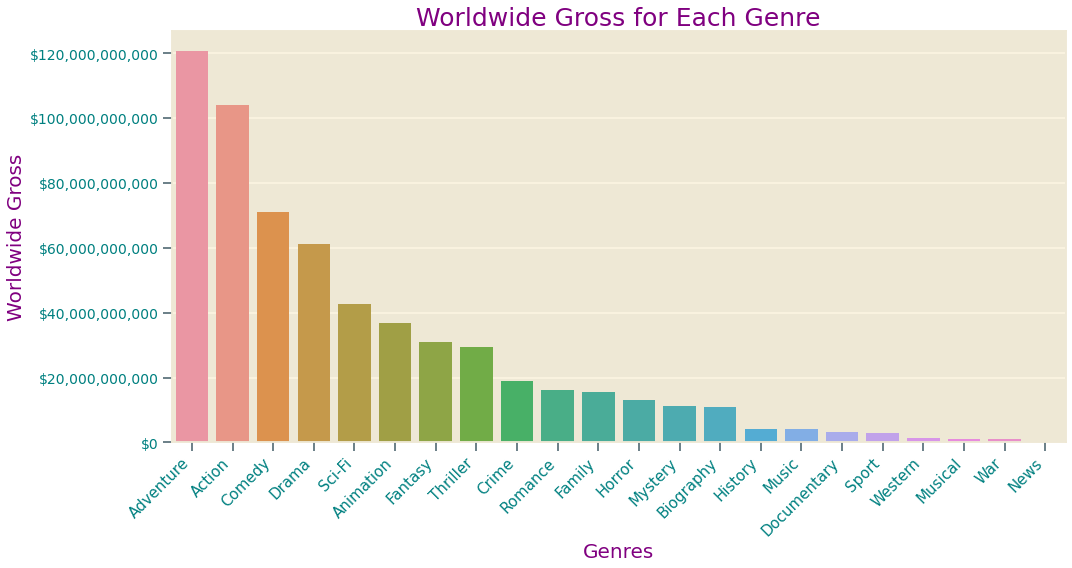

In [234]:
# call function to print graph
worldwide_gross_graph(df_genres_aggregated,'worldwide_gross')

> It looks like the three highest performing genres are Adventure, Action, and Drama.  Comedy is pretty close to these but after that there is a dramatic drop.

> Everything after these top four seem like genres with specific elements that make them less appealing on a mass scale so this makes sense why we might see a drop in overall gross.

> Since movies can and usually do have multiple genre tags, what we are really seeing is which elements of a movie might point to a higher chance of success by appealing to more people.

> Something that might be causing this large of a gap is the fact that businesses tend to make more of products that show success.  The reason this might skew our data some is that if they continue to make action and adventure movies with some drama and/or comedy elements then those are the numbers that will continue to increase.  Customers only have the option to see movies that are actually made and businesses tend to pick the safer option when choosing where to invest.

> The obvious success of these elements allows for some clear recommendations but it is important to understand that the positive reinforcing nature of these top 4 genres successes means that some of the lower values are probably not indicative of how popular they might actually be.  Both because there are less of them being made and that there is less investment of talent and resources put into those projects that are made.

> It would be prudent to investigate how some of these more niche genres are received when combined with the very popular but generic ideas of adventure, action, drama, and comedy.
> Another factor to investigate could be comparing this data but including consideration of a movie's cost to produce.  It is possible this could level the results out some.


In [235]:
df_genre_exploded.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count,Genres
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Action
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Adventure
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Fantasy
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Action
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Adventure


In [236]:
# create new column and set equal to worldwide gross minus production_budget
df_genre_exploded['profit'] = df_genre_exploded[
                'worldwide_gross'] - df_genre_exploded['production_budget']
df_genre_exploded

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count,Genres,profit
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Action,635063875
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Adventure,635063875
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Fantasy,635063875
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Action,1072413963
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Adventure,1072413963
...,...,...,...,...,...,...,...,...,...,...,...,...
4244,dry spell,22000,0,0,90.0,"Comedy,Romance",en,0.600,6.0,1,Romance,-22000
4245,all superheroes must die,20000,0,0,78.0,"Sci-Fi,Thriller",en,2.078,3.9,19,Sci-Fi,-20000
4245,all superheroes must die,20000,0,0,78.0,"Sci-Fi,Thriller",en,2.078,3.9,19,Thriller,-20000
4246,newlyweds,9000,4584,4584,95.0,"Comedy,Drama",en,1.973,5.4,7,Comedy,-4416


> Looks like there are some values of 0 in worldwide gross and this is most likely referring to null values rather than movies that made exactly 0 dollars.

> This wouldn't have effected the totals from the previous graph in a negative way but here we don't have to provide negative numbers that don't represent the data correctly.  Let's remove these.

In [237]:
# new dataframe that exludes any movies with a worldwide gross of 0
df_genre_exploded_profit = df_genre_exploded[
                            df_genre_exploded.worldwide_gross != 0]
df_genre_exploded_profit

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count,Genres,profit
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Action,635063875
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Adventure,635063875
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Fantasy,635063875
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Action,1072413963
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Adventure,1072413963
...,...,...,...,...,...,...,...,...,...,...,...,...
4238,exeter,25000,0,489792,91.0,"Horror,Mystery,Thriller",en,5.934,4.7,121,Horror,464792
4238,exeter,25000,0,489792,91.0,"Horror,Mystery,Thriller",en,5.934,4.7,121,Mystery,464792
4238,exeter,25000,0,489792,91.0,"Horror,Mystery,Thriller",en,5.934,4.7,121,Thriller,464792
4246,newlyweds,9000,4584,4584,95.0,"Comedy,Drama",en,1.973,5.4,7,Comedy,-4416


In [238]:
# within the new dataframe remove any movies with a production budget of 0
df_genre_exploded_profit = df_genre_exploded_profit[
                            df_genre_exploded_profit.production_budget != 0]
df_genre_exploded_profit

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count,Genres,profit
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Action,635063875
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Adventure,635063875
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,Fantasy,635063875
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Action,1072413963
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,Adventure,1072413963
...,...,...,...,...,...,...,...,...,...,...,...,...
4238,exeter,25000,0,489792,91.0,"Horror,Mystery,Thriller",en,5.934,4.7,121,Horror,464792
4238,exeter,25000,0,489792,91.0,"Horror,Mystery,Thriller",en,5.934,4.7,121,Mystery,464792
4238,exeter,25000,0,489792,91.0,"Horror,Mystery,Thriller",en,5.934,4.7,121,Thriller,464792
4246,newlyweds,9000,4584,4584,95.0,"Comedy,Drama",en,1.973,5.4,7,Comedy,-4416


In [239]:
# Sum each column in exploded df and groupby Genres to get the total gross of
# movies with the associated genre tag
df_genres_profit_aggregated = df_genre_exploded_profit.groupby('Genres').sum().sort_values('profit', 
                                                      ascending=False)

df_genres_profit_aggregated

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,profit
Genres,,,,,,,,
Adventure,36773916000,42494811665,120733370528,39681.0,6218.123,2261.3,1330190,83959454528
Action,35374600000,38060453600,104152850255,50100.0,7218.191,2752.9,1403238,68778250255
Comedy,21820964000,31654675274,71049457086,57305.0,6411.212,3500.4,882554,49228493086
Drama,22797942023,27941299031,61249122144,94425.0,8697.487,5578.6,1168239,38451180121
Sci-Fi,11858492373,15277680343,42727241664,15731.0,2393.102,873.7,609614,30868749291
Animation,9820500000,13398804658,36829952023,9789.0,1599.006,668.4,267492,27009452023
Thriller,9114267650,11449456307,29369196295,30244.0,3299.634,1703.6,466100,20254928645
Fantasy,11120050000,10686667118,31021787013,14730.0,2050.286,813.9,380993,19901737013
Crime,8096956000,8953025009,19014088453,27511.0,3085.822,1575.5,393035,10917132453


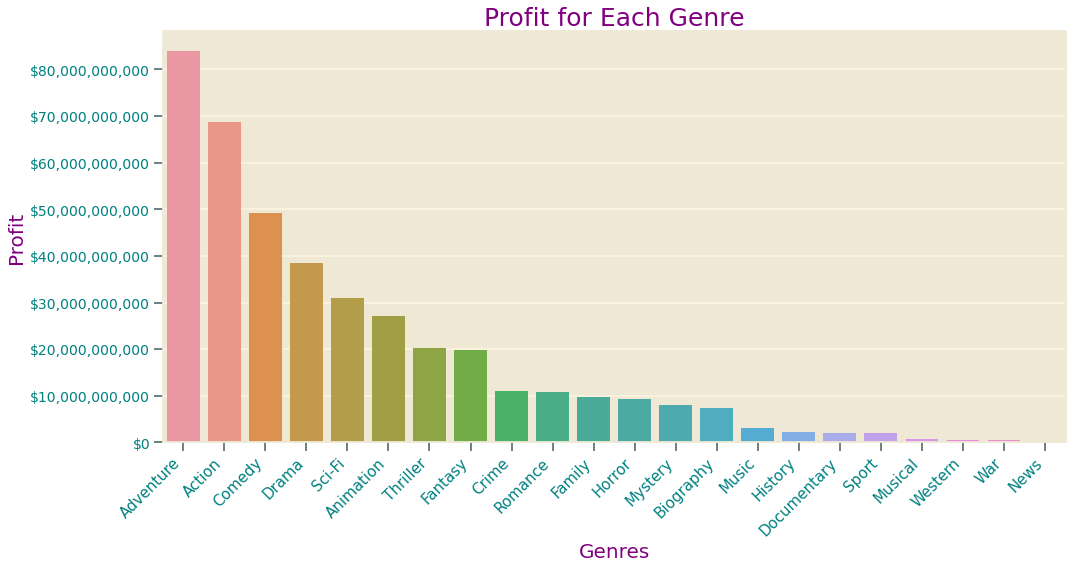

In [240]:
# create figure and axis for barplot showing total worldwide gross for each genre
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df_genres_profit_aggregated, 
                 x=df_genres_profit_aggregated.index, y='profit')

# set y-axis tick labels to plain style for readability
plt.ticklabel_format(style='plain', axis='y')
# create string format for y-axis tick labels
gross_format = mpl.ticker.StrMethodFormatter('${x:,.0f}')

# apply string format to worldwide gross values
ax.yaxis.set_major_formatter(gross_format)
ax.yaxis.set_tick_params(labelcolor='teal', labelsize=14)
# rotate tick labels for genres to help with readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.xaxis.set_tick_params(labelcolor='teal', labelsize=15)

plt.title("Profit for Each Genre", color='purple', fontsize=25)
plt.ylabel("Profit", color='purple', fontsize=20)
plt.xlabel("Genres", color='purple', fontsize=20)

plt.tight_layout();

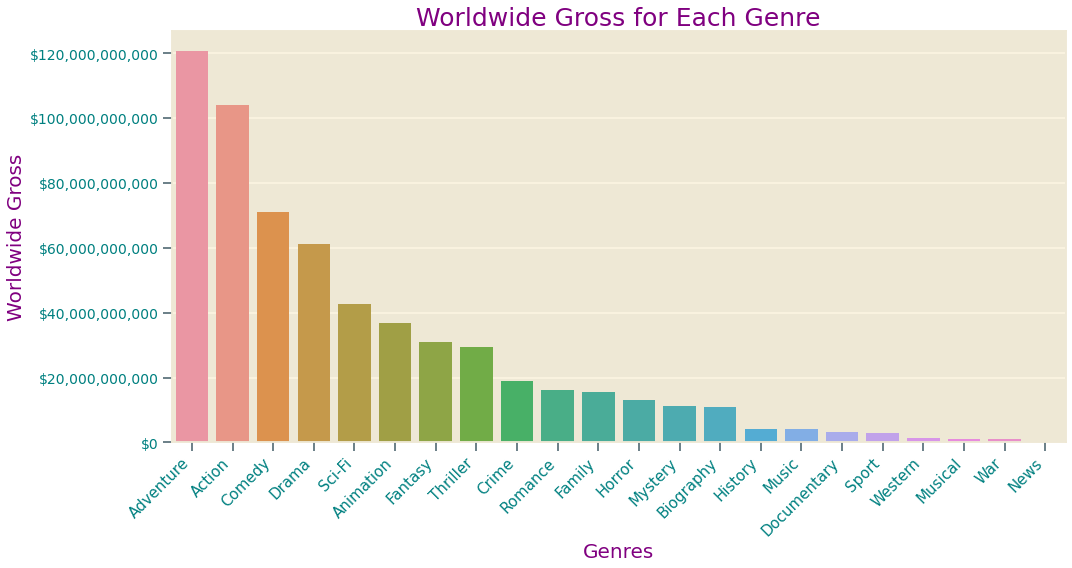

In [241]:
# regraph worldwide grosses graph to compare to profit one
worldwide_gross_graph(df_genres_aggregated,'worldwide_gross')

> It looks like there is some shuffling of some of the genres but no huge swings.  Digging deeper into specific combinations of this data could help with cost saving analysis and overall production efficiency.  

> For instance if you are trying to decided between multiple projects that have similar profit potential, this data could show which genre combinations trend towards higher production costs and/or take longer to complete.  This direction of this analysis could point a company towards projects that are time efficient and resource effecient.

In [242]:
# create new df with top 8 genres
top_eight_grosses = df_genres_aggregated.iloc[0:8]
top_eight_grosses

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count
Genres,,,,,,,
Adventure,36853516000,42494811665,120733370528,40645.0,6265.609,2316.8,1330802
Action,35603375000,38060453600,104152850255,52680.0,7346.256,2877.1,1408091
Comedy,21968432173,31654675274,71049457086,60681.0,6541.590,3684.7,885006
Drama,23002684023,27941299031,61249122144,100360.0,8952.703,5928.2,1176579
Sci-Fi,11907137373,15277680343,42727241664,17134.0,2470.919,942.0,614999
Animation,9847000000,13398804658,36829952023,10041.0,1601.962,678.4,267500
Fantasy,11248450000,10686667118,31021787013,15231.0,2091.302,844.6,384981
Thriller,9246187650,11449456307,29369196295,33672.0,3432.053,1893.1,467779


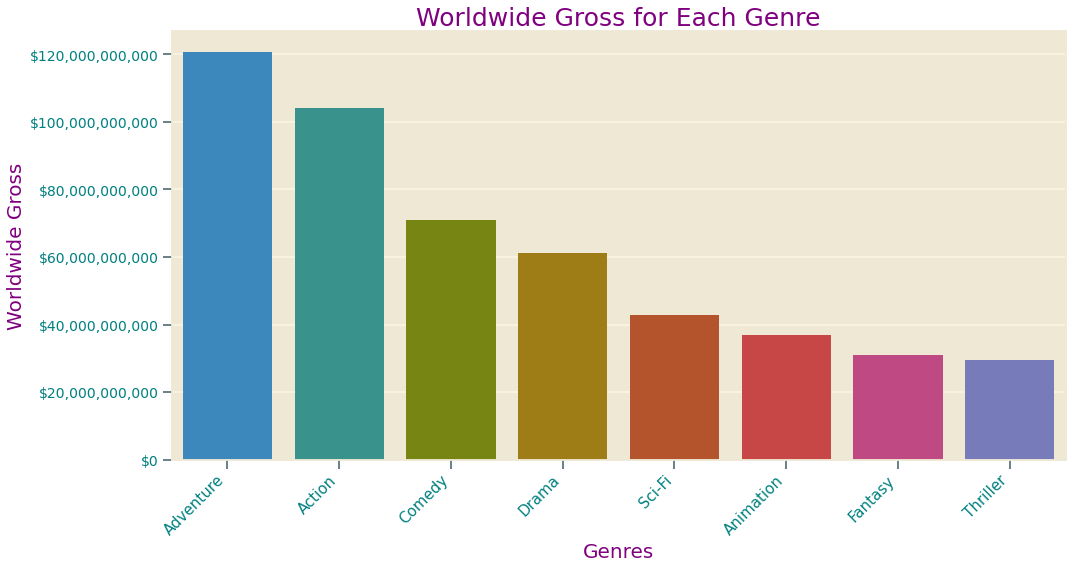

In [243]:
# replot the top 8 from previous graph for more detail
plt.figure(figsize = (15,8))
ax = sns.barplot(data=top_eight_grosses, x=top_eight_grosses.index, 
                                                y='worldwide_gross')

# set y-axis tick labels to plain style for readability
plt.ticklabel_format(style='plain', axis='y')
# create string format for y-axis tick labels
gross_format = mpl.ticker.StrMethodFormatter('${x:,.0f}')

# apply string format to worldwide gross values
ax.yaxis.set_major_formatter(gross_format)
ax.yaxis.set_tick_params(labelcolor='teal', labelsize=14)
# rotate tick labels for genres to help with readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.xaxis.set_tick_params(labelcolor='teal', labelsize=15)

plt.title("Worldwide Gross for Each Genre", color='purple', fontsize=25)
plt.ylabel("Worldwide Gross", color='purple', fontsize=20)
plt.xlabel("Genres", color='purple', fontsize=20)

plt.tight_layout();

**Recommendation**
> Actively pursue projects within the Adventure, Action, Drama, and Comedy genres.

> Projects with multiple of these key elements are in most cases even more attractive.

## Does runtime effect the success of a movie?


In [244]:
df_popularity = df_genre_grosses_merged_final
df_popularity.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,original_language,popularity,vote_average,vote_count,Genres
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",en,30.579,6.4,8571,"[Action, Adventure, Fantasy]"
1,avengers age of ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",en,44.383,7.3,13457,"[Action, Adventure, Sci-Fi]"
2,avengers infinity war,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",en,80.773,8.3,13948,"[Action, Adventure, Sci-Fi]"
3,justice league,300000000,229024295,655945209,120.0,"Action,Adventure,Fantasy",en,34.953,6.2,7510,"[Action, Adventure, Fantasy]"
5,spectre,300000000,200074175,879620923,148.0,"Action,Adventure,Thriller",en,30.318,6.4,6719,"[Action, Adventure, Thriller]"


In [245]:
df_popularity.drop(columns=['genres', 'original_language'], 
                                            axis=1, inplace=True)
df_popularity.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,Genres
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,30.579,6.4,8571,"[Action, Adventure, Fantasy]"
1,avengers age of ultron,330600000,459005868,1403013963,141.0,44.383,7.3,13457,"[Action, Adventure, Sci-Fi]"
2,avengers infinity war,300000000,678815482,2048134200,149.0,80.773,8.3,13948,"[Action, Adventure, Sci-Fi]"
3,justice league,300000000,229024295,655945209,120.0,34.953,6.2,7510,"[Action, Adventure, Fantasy]"
5,spectre,300000000,200074175,879620923,148.0,30.318,6.4,6719,"[Action, Adventure, Thriller]"


> This table has multiple options for determining how much impact runtime plays in box office success as well as audience score.

> Since there are a couple options, it seems good to get an overview of the data first.

In [246]:
# get overview of data in table
df_popularity.describe()

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count
count,1.855000e+03,1.855000e+03,1.855000e+03,1855.000000,1855.000000,1855.000000,1855.000000
mean,3.868944e+07,4.777058e+07,1.176981e+08,104.115903,10.822361,6.143881,1644.583288
std,5.158138e+07,7.740550e+07,2.111448e+08,19.441835,8.048705,1.079791,2583.736185
min,9.000000e+03,0.000000e+00,0.000000e+00,1.000000,0.600000,0.000000,1.000000
25%,5.000000e+06,1.065668e+06,3.355112e+06,92.000000,6.121000,5.600000,83.000000
50%,2.000000e+07,2.037791e+07,3.696466e+07,103.000000,9.521000,6.200000,636.000000
75%,4.800000e+07,5.814851e+07,1.266412e+08,115.000000,14.348000,6.800000,2035.500000
max,4.106000e+08,7.000596e+08,2.048134e+09,180.000000,80.773000,10.000000,22186.000000


> Using the grosses I can look at the financial success based on runtime.  And then there is also the audience score represented by popularity and vote_average.  For the audience rating it is going to be valuable to look at ratings that represent higher vote counts because it is more data more likely to be an accurate representation of the general audience.

> It seems that the vote count can range anywhere from 1 vote to 22,186 votes.  The average vote count is 1,261. Although more data is better, it's possible that excluding some of the extremely low vote counts might give a more accurate representation overall. 

In [247]:
# create function to provide how many movies are over or under a threshold
# for a designated column
def gt_ln_count(n, column):
    
    less_than = df_popularity[df_popularity['vote_count'] <= n]
    print(f'Amount with less than {n} {column}: {len(less_than)}')

    greater_than = df_popularity[df_popularity['vote_count'] > n]
    print(f'Amount with more than {n} {column}: {len(greater_than)}')
    
    print('\n')

In [248]:
gt_ln_count(10000, 'vote_count')
gt_ln_count(5000, 'vote_count')
gt_ln_count(2500, 'vote_count')
gt_ln_count(1000, 'vote_count')
gt_ln_count(500, 'vote_count')
gt_ln_count(100, 'vote_count')
gt_ln_count(50, 'vote_count')
gt_ln_count(10, 'vote_count')
gt_ln_count(5, 'vote_count')
gt_ln_count(1, 'vote_count')

Amount with less than 10000 vote_count: 1809
Amount with more than 10000 vote_count: 46


Amount with less than 5000 vote_count: 1700
Amount with more than 5000 vote_count: 155


Amount with less than 2500 vote_count: 1470
Amount with more than 2500 vote_count: 385


Amount with less than 1000 vote_count: 1103
Amount with more than 1000 vote_count: 752


Amount with less than 500 vote_count: 862
Amount with more than 500 vote_count: 993


Amount with less than 100 vote_count: 496
Amount with more than 100 vote_count: 1359


Amount with less than 50 vote_count: 389
Amount with more than 50 vote_count: 1466


Amount with less than 10 vote_count: 232
Amount with more than 10 vote_count: 1623


Amount with less than 5 vote_count: 172
Amount with more than 5 vote_count: 1683


Amount with less than 1 vote_count: 65
Amount with more than 1 vote_count: 1790




In [249]:
# create function that generates two scatter plots side by side for comparison
def scatterplot_compare(df, xaxis1, yaxis1, title1, xaxis2, yaxis2, title2, suptitle):
    
    # set plt style and seaborn context
    plt.style.use('Solarize_Light2')
    sns.set_context('talk', font_scale=1)
    
    # create figure and axes
    fig, axes = plt.subplots(ncols=2, figsize=(20,8))
    
    # plot scatter 1
    ax1 = sns.scatterplot(data=df, x=xaxis1, y=yaxis1, ax=axes[0])
    ax1.set_title(title1)
    
    # plot scatter 2
    ax2 = sns.scatterplot(data=df, x=xaxis2, y=yaxis2, ax=axes[1])
    ax2.set_title(title2)
    
    fig.suptitle(suptitle, color='black', fontweight='bold')
    
    fig.tight_layout();

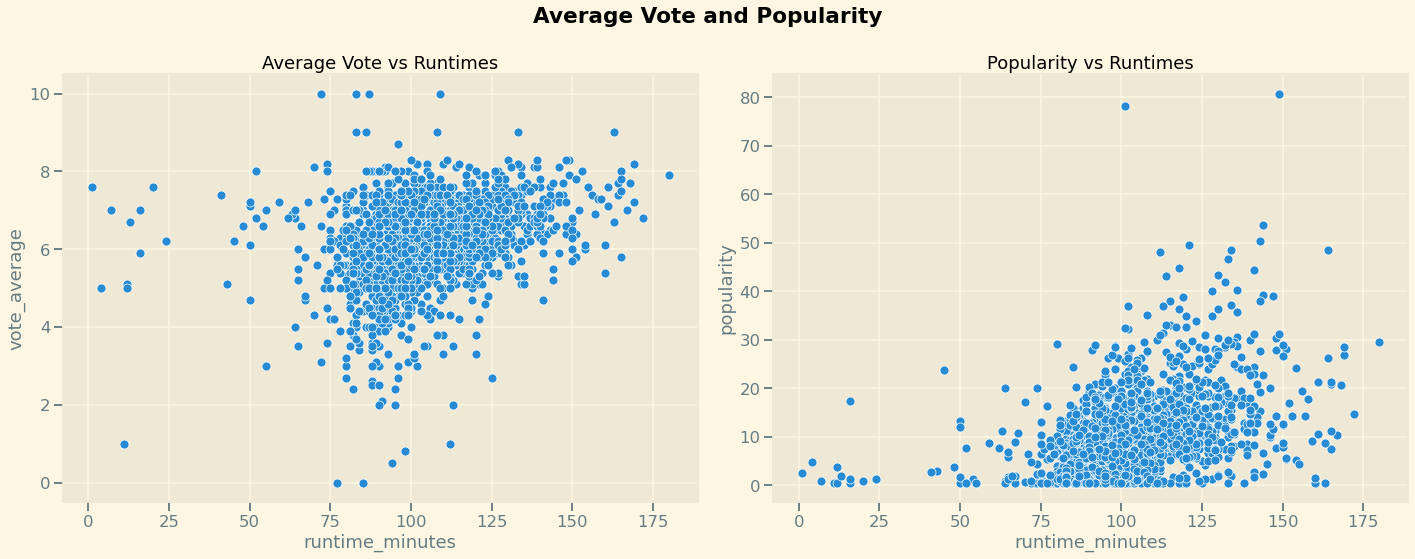

In [250]:
scatterplot_compare(df_popularity, 
                    'runtime_minutes', 'vote_average', 'Average Vote vs Runtimes',
                    'runtime_minutes', 'popularity', 'Popularity vs Runtimes',
                    'Average Vote and Popularity')

> Visually it is apparent that there are a few outliers in the runtime section.  It is interesting that these 4 extremely long movies had an even spread across average vote, the popularity for each one is very low.  A little interesting but these can be ignored for the purposes here.

> Since there are only 4 and they are skewing our visualization I will just remove them.

In [251]:
# remove movies longer than 200 minutes
df_popularity_trunc = df_popularity[df_popularity['runtime_minutes'] <= 200]
df_popularity_trunc.describe()

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count
count,1.855000e+03,1.855000e+03,1.855000e+03,1855.000000,1855.000000,1855.000000,1855.000000
mean,3.868944e+07,4.777058e+07,1.176981e+08,104.115903,10.822361,6.143881,1644.583288
std,5.158138e+07,7.740550e+07,2.111448e+08,19.441835,8.048705,1.079791,2583.736185
min,9.000000e+03,0.000000e+00,0.000000e+00,1.000000,0.600000,0.000000,1.000000
25%,5.000000e+06,1.065668e+06,3.355112e+06,92.000000,6.121000,5.600000,83.000000
50%,2.000000e+07,2.037791e+07,3.696466e+07,103.000000,9.521000,6.200000,636.000000
75%,4.800000e+07,5.814851e+07,1.266412e+08,115.000000,14.348000,6.800000,2035.500000
max,4.106000e+08,7.000596e+08,2.048134e+09,180.000000,80.773000,10.000000,22186.000000


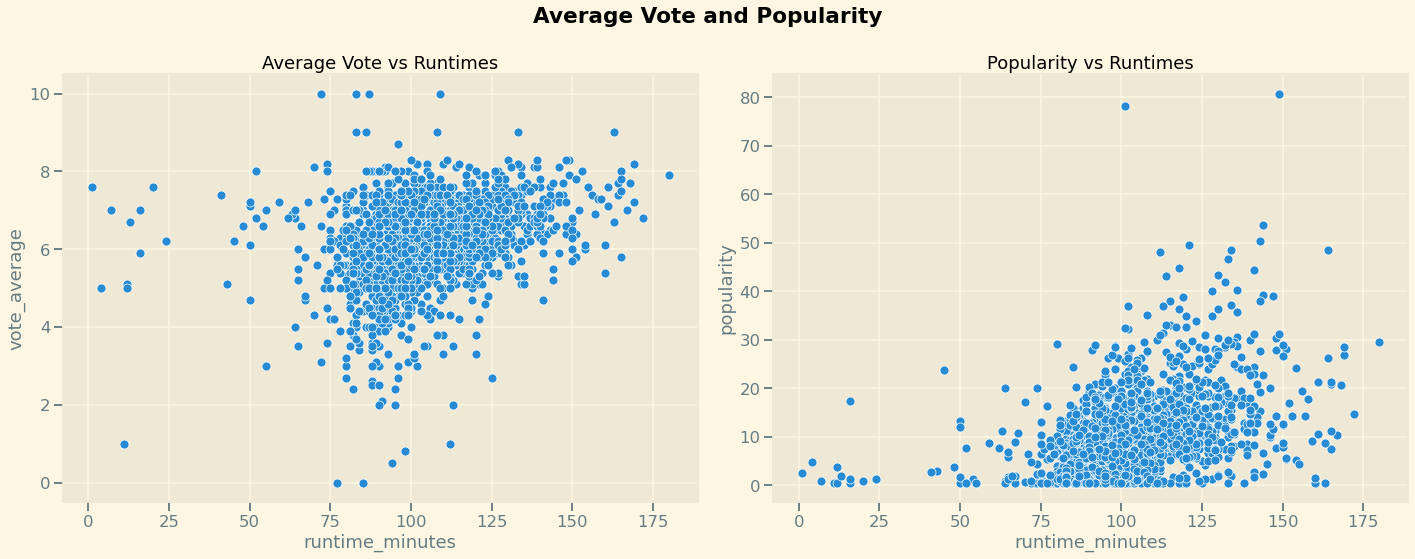

In [252]:
# replot comparison scatterplots
scatterplot_compare(df_popularity_trunc, 
                    'runtime_minutes', 'vote_average', 
                    'Average Vote vs Runtimes',
                    'runtime_minutes', 'popularity', 
                    'Popularity vs Runtimes',
                    'Average Vote and Popularity')

In [253]:
df_popularity.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,Genres
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,30.579,6.4,8571,"[Action, Adventure, Fantasy]"
1,avengers age of ultron,330600000,459005868,1403013963,141.0,44.383,7.3,13457,"[Action, Adventure, Sci-Fi]"
2,avengers infinity war,300000000,678815482,2048134200,149.0,80.773,8.3,13948,"[Action, Adventure, Sci-Fi]"
3,justice league,300000000,229024295,655945209,120.0,34.953,6.2,7510,"[Action, Adventure, Fantasy]"
5,spectre,300000000,200074175,879620923,148.0,30.318,6.4,6719,"[Action, Adventure, Thriller]"


In [254]:
lengths = []
for time in df_popularity['runtime_minutes']:
    if time > 0 and time <= 60:
        length = 'short'
        lengths.append(length)
    elif time > 60 and time <= 120:
        length = 'medium'
        lengths.append(length)
    elif time > 120 and time <= 200:
        length = 'long'
        lengths.append(length)
        
lengths[:10]

['long',
 'long',
 'long',
 'medium',
 'long',
 'long',
 'long',
 'long',
 'long',
 'medium']

In [255]:
df_popularity['length'] = lengths
df_popularity.head()

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,Genres,length
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,30.579,6.4,8571,"[Action, Adventure, Fantasy]",long
1,avengers age of ultron,330600000,459005868,1403013963,141.0,44.383,7.3,13457,"[Action, Adventure, Sci-Fi]",long
2,avengers infinity war,300000000,678815482,2048134200,149.0,80.773,8.3,13948,"[Action, Adventure, Sci-Fi]",long
3,justice league,300000000,229024295,655945209,120.0,34.953,6.2,7510,"[Action, Adventure, Fantasy]",medium
5,spectre,300000000,200074175,879620923,148.0,30.318,6.4,6719,"[Action, Adventure, Thriller]",long


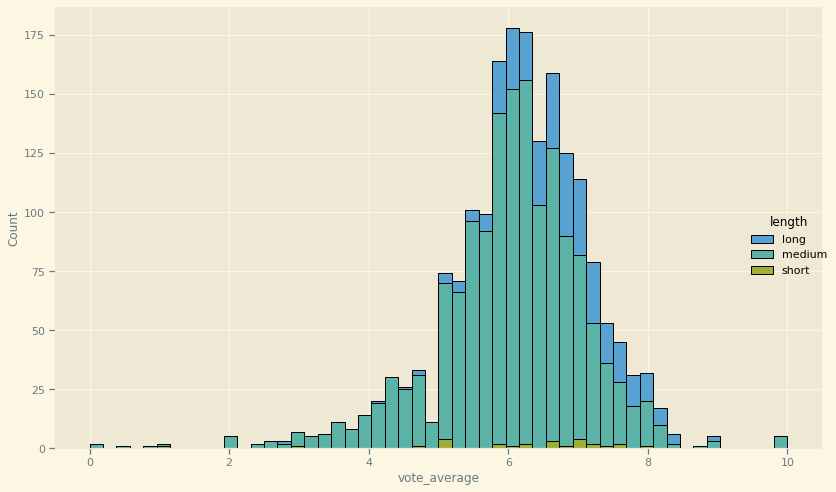

In [256]:
sns.set_context('notebook')

sns.displot(data=df_popularity, x='vote_average', hue='length', 
                        multiple='stack', aspect=1.5, height=7);

plt.tight_layout()


In [257]:
df2 = df_popularity[df_popularity['vote_average'] > 3]

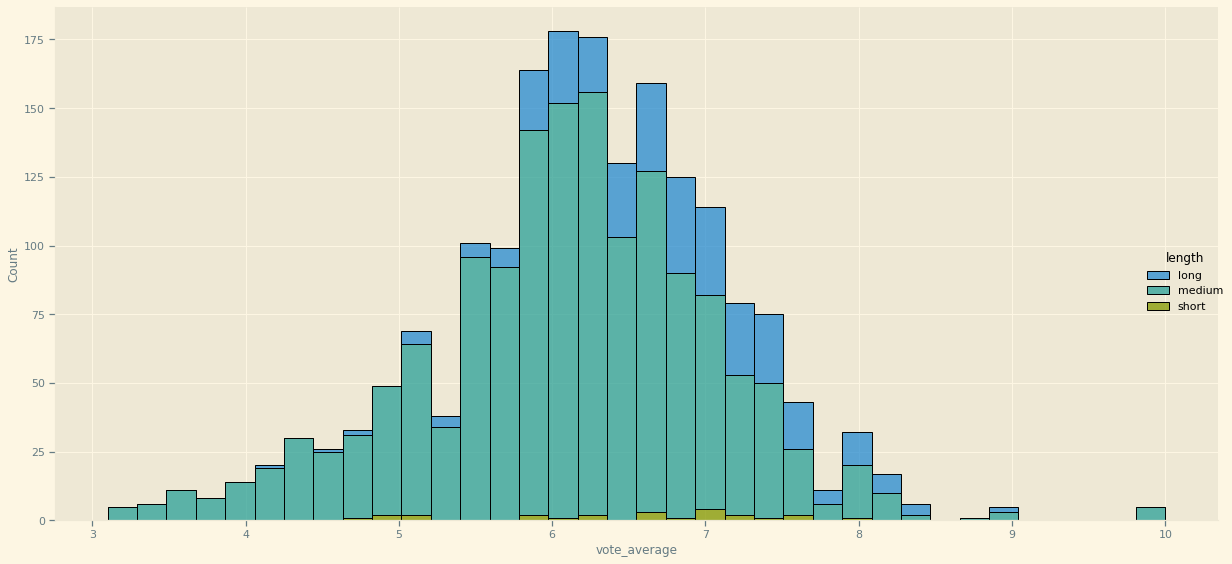

In [258]:
sns.displot(data=df2, x='vote_average', hue='length', multiple='stack', aspect=2, height=8);

plt.tight_layout()

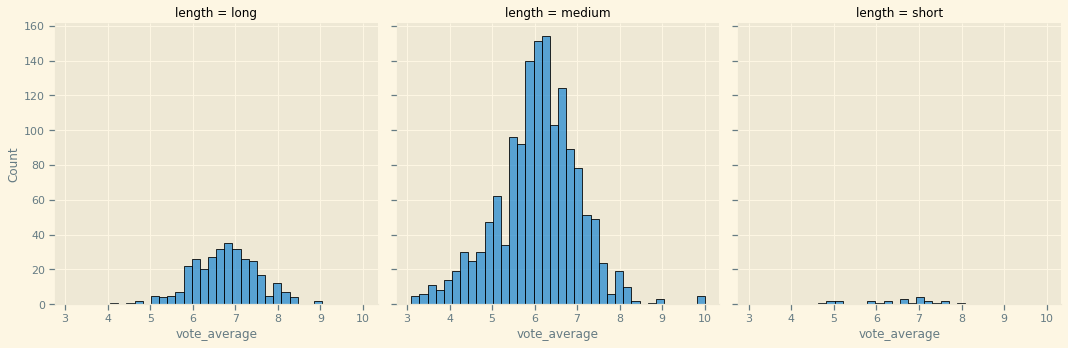

In [259]:

# create displot for vote average 
sns.displot(data=df2, x='vote_average', col='length');

plt.tight_layout()

* A couple of things to talk about here
    * There are a lot more medium length (1-2 hours) than short or long
    * There is a tendency for the audience's average vote to tend towards the 5-8 range for all three lengths
    * We do see that the movies with an 8+ average score are dominated heavily by the medium length. Although the previous graph showed that the 3.5 and under were also dominated by medium movies.  It seems more likely that these outlier ratings are not related to runtime as much other factors specific to those movies.
    * The long length movies (2-3 hours) are clustered in the 5.5-7.5 range while the short length (60 min or less) are spread out more uniform.
    
    ****

     **Conclusions**
     
     1. There is at least a weak correlation to runtime and the audience reaction.
     2. Any length of movie can be successful from an audience's pov; however, the amount of audience success seems to have an upper limit for *long* movies.

In [260]:
df_popularity_profit = df_popularity
df_popularity_profit['profit'] = df_popularity_profit['worldwide_gross'] - df_popularity_profit['production_budget']
print(df_popularity_profit.head(1))
print(dashes)
df_popularity_profit.describe()

                                        movie  production_budget  \
0  pirates of the caribbean on stranger tides          410600000   

   domestic_gross  worldwide_gross  runtime_minutes  popularity  vote_average  \
0       241063875       1045663875            136.0      30.579           6.4   

   vote_count                        Genres length     profit  
0        8571  [Action, Adventure, Fantasy]   long  635063875  
---------------------------------------------------------------------------


,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,profit
count,1.855000e+03,1.855000e+03,1.855000e+03,1855.000000,1855.000000,1855.000000,1855.000000,1.855000e+03
mean,3.868944e+07,4.777058e+07,1.176981e+08,104.115903,10.822361,6.143881,1644.583288,7.900865e+07
std,5.158138e+07,7.740550e+07,2.111448e+08,19.441835,8.048705,1.079791,2583.736185,1.728417e+08
min,9.000000e+03,0.000000e+00,0.000000e+00,1.000000,0.600000,0.000000,1.000000,-1.104502e+08
25%,5.000000e+06,1.065668e+06,3.355112e+06,92.000000,6.121000,5.600000,83.000000,-1.711194e+06
50%,2.000000e+07,2.037791e+07,3.696466e+07,103.000000,9.521000,6.200000,636.000000,1.361892e+07
75%,4.800000e+07,5.814851e+07,1.266412e+08,115.000000,14.348000,6.800000,2035.500000,7.867752e+07
max,4.106000e+08,7.000596e+08,2.048134e+09,180.000000,80.773000,10.000000,22186.000000,1.748134e+09


> Now that I am looking at grosses and profit, we can take a closer look at the values with describe.  There are min values of 0 for the budget and worldwide gross.  
> I will remove rows with 0 values for any of these because most likely this means the data just missing.  No movie costs nothing to make, it's unlikely a movie would make money internationally but 0 domestically, and any movie that has been released would have at least some worldwide gross. 
> Missing any of these values would indicate inaccurate financial information overall including the profit column that was created.

In [261]:
# remove movies that have a value of 0 for production budget or worldwide gross
df3 = df_popularity_profit[df_popularity_profit['production_budget'] != 0]
df3 = df3[df3['worldwide_gross'] != 0]
df3 = df3[df3['domestic_gross'] != 0]
df3

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,Genres,length,profit
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,30.579,6.4,8571,"[Action, Adventure, Fantasy]",long,635063875
1,avengers age of ultron,330600000,459005868,1403013963,141.0,44.383,7.3,13457,"[Action, Adventure, Sci-Fi]",long,1072413963
2,avengers infinity war,300000000,678815482,2048134200,149.0,80.773,8.3,13948,"[Action, Adventure, Sci-Fi]",long,1748134200
3,justice league,300000000,229024295,655945209,120.0,34.953,6.2,7510,"[Action, Adventure, Fantasy]",medium,355945209
5,spectre,300000000,200074175,879620923,148.0,30.318,6.4,6719,"[Action, Adventure, Thriller]",long,579620923
...,...,...,...,...,...,...,...,...,...,...,...
4222,counting,50000,8374,8374,111.0,0.600,8.3,3,[Documentary],medium,-41626
4228,raymond did it,40000,3632,3632,83.0,1.675,3.7,8,[Horror],medium,-36368
4232,krisha,30000,144822,144822,83.0,0.600,9.0,1,[Drama],medium,114822
4236,emily,27000,3547,3547,83.0,0.600,7.0,1,[Drama],medium,-23453


In [262]:
# create function that generates two scatter with dollar formatting for y axis
def scatterplot_compare_dollars(df, xaxis1, yaxis1, title1, xaxis2, yaxis2, title2, suptitle):
    
    # set plt style and seaborn context
    plt.style.use('Solarize_Light2')
    sns.set_context('talk', font_scale=1)
    
    # create figure and axes
    fig, axes = plt.subplots(ncols=2, figsize=(20,8))
    
    # set y-axis tick labels to plain style for readability
    plt.ticklabel_format(style='plain', axis='y')
    # create string format for y-axis tick labels
    value_format = mpl.ticker.StrMethodFormatter('${x:,.0f}')
    
    # plot scatter 1
    ax1 = sns.scatterplot(data=df, x=xaxis1, y=yaxis1, ax=axes[0])
    ax1.set_title(title1)
    ax1.yaxis.set_major_formatter(value_format)
    
    # plot scatter 2
    ax2 = sns.scatterplot(data=df, x=xaxis2, y=yaxis2, ax=axes[1])
    ax2.set_title(title2)
    ax2.yaxis.set_major_formatter(value_format)
    
    fig.suptitle(suptitle, color='black', fontweight='bold')
    
    fig.tight_layout();

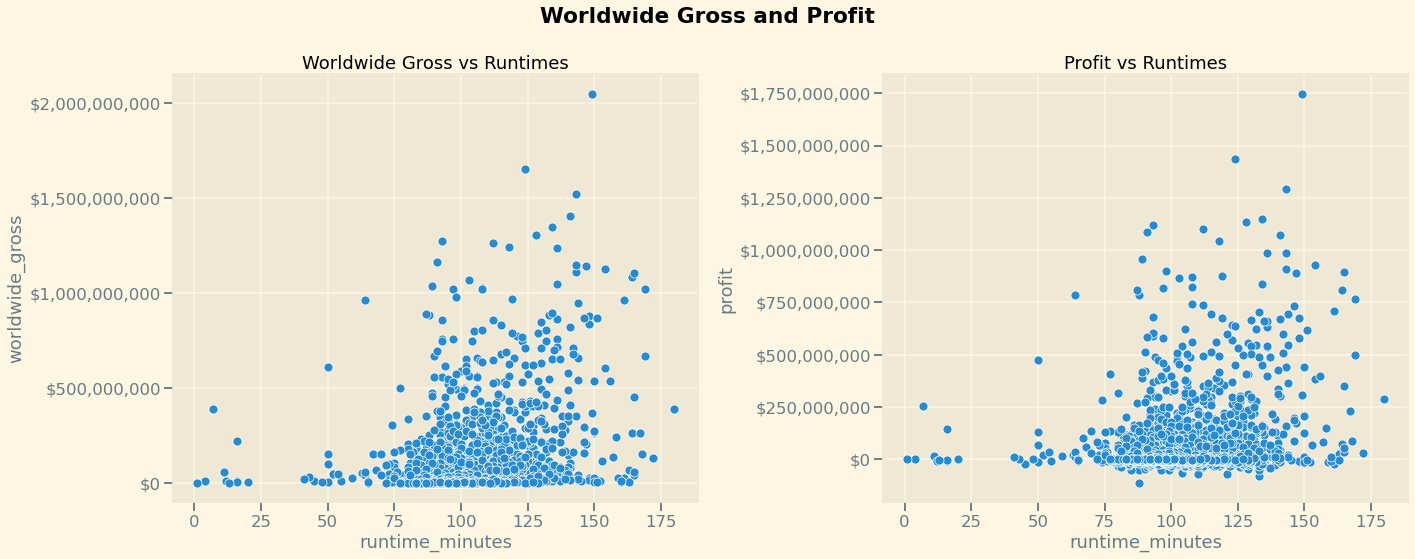

In [263]:
scatterplot_compare_dollars(df3, 'runtime_minutes', 'worldwide_gross', 
                    'Worldwide Gross vs Runtimes',
                    'runtime_minutes', 'profit', 'Profit vs Runtimes',
                    'Worldwide Gross and Profit')

> It is hard to see much in the big clump where most of the data is.  The larger grossing movies are skewing it just enough though not all of them would qualify as outliers.  Lets look at which movies they are and see if it would be worth removing some amount to better view the data.

In [264]:
# sort dataframe rows by worldwide_gross values from highest to lowest
df3 = df3.sort_values('worldwide_gross', axis=0, ascending=False)
# reset the index since sorting the values will also mess up our index
df3.reset_index(inplace=True)
# permanently drop old index that is now a column called index
df3.drop('index', axis=1, inplace=True)
# preview
df3

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,Genres,length,profit
0,avengers infinity war,300000000,678815482,2048134200,149.0,80.773,8.3,13948,"[Action, Adventure, Sci-Fi]",long,1748134200
1,jurassic world,215000000,652270625,1648854864,124.0,20.709,6.6,14056,"[Action, Adventure, Sci-Fi]",long,1433854864
2,the avengers,225000000,623279547,1517935897,143.0,50.289,7.6,19673,"[Action, Adventure, Sci-Fi]",long,1292935897
3,avengers age of ultron,330600000,459005868,1403013963,141.0,44.383,7.3,13457,"[Action, Adventure, Sci-Fi]",long,1072413963
4,black panther,200000000,700059566,1348258224,134.0,2.058,5.1,11,"[Action, Adventure, Sci-Fi]",long,1148258224
...,...,...,...,...,...,...,...,...,...,...,...
1628,born to fly elizabeth streb vs gravity,500000,1822,1822,82.0,0.600,5.5,2,"[Action, Biography, Documentary]",medium,-498178
1629,detention of the dead,500000,1778,1778,87.0,4.268,5.0,50,"[Action, Adventure, Comedy]",medium,-498222
1630,the looking glass,300000,1711,1711,80.0,0.600,5.0,1,[Fantasy],medium,-298289
1631,skin trade,9000000,1242,1242,78.0,9.362,5.6,96,[Documentary],medium,-8998758


In [265]:
df3.shape

(1633, 11)

In [266]:
# slice everything except the first 100 which would be the highest grossing
df3_trunc = df3[100:]
df3_trunc

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,Genres,length,profit
100,sherlock holmes a game of shadows,125000000,186848418,535663443,129.0,18.301,7.1,6380,"[Action, Adventure, Crime]",long,410663443
101,cinderella,95000000,201151353,534551353,150.0,29.056,6.7,4517,[Musical],long,439551353
102,the revenant,135000000,183637894,532938302,156.0,19.410,7.4,11064,"[Action, Adventure, Biography]",long,397938302
103,world war z,190000000,202359711,531514650,116.0,14.582,6.7,9132,"[Action, Adventure, Horror]",medium,341514650
104,the meg,178000000,145443742,529530715,113.0,31.397,5.9,2896,"[Action, Horror, Sci-Fi]",medium,351530715
...,...,...,...,...,...,...,...,...,...,...,...
1628,born to fly elizabeth streb vs gravity,500000,1822,1822,82.0,0.600,5.5,2,"[Action, Biography, Documentary]",medium,-498178
1629,detention of the dead,500000,1778,1778,87.0,4.268,5.0,50,"[Action, Adventure, Comedy]",medium,-498222
1630,the looking glass,300000,1711,1711,80.0,0.600,5.0,1,[Fantasy],medium,-298289
1631,skin trade,9000000,1242,1242,78.0,9.362,5.6,96,[Documentary],medium,-8998758


> Removing the largest 100 entries still has a large portion in the hundreds of millions.

> Movies that gross over 100 million are going to do it because they have an existing fan base or some other built in mechanism that the people green lighting them can trust.  Specific amounts beyond that level of success don't have much bearing on what we are asking.

> We want to know if there is a certain length range that will provide a better chance for success.

> So first since we've done most of the work I will re-graph the previous graph, removing a large amount of the highest grossing movies while leaving enough to still have a meaningfully large dataset. 

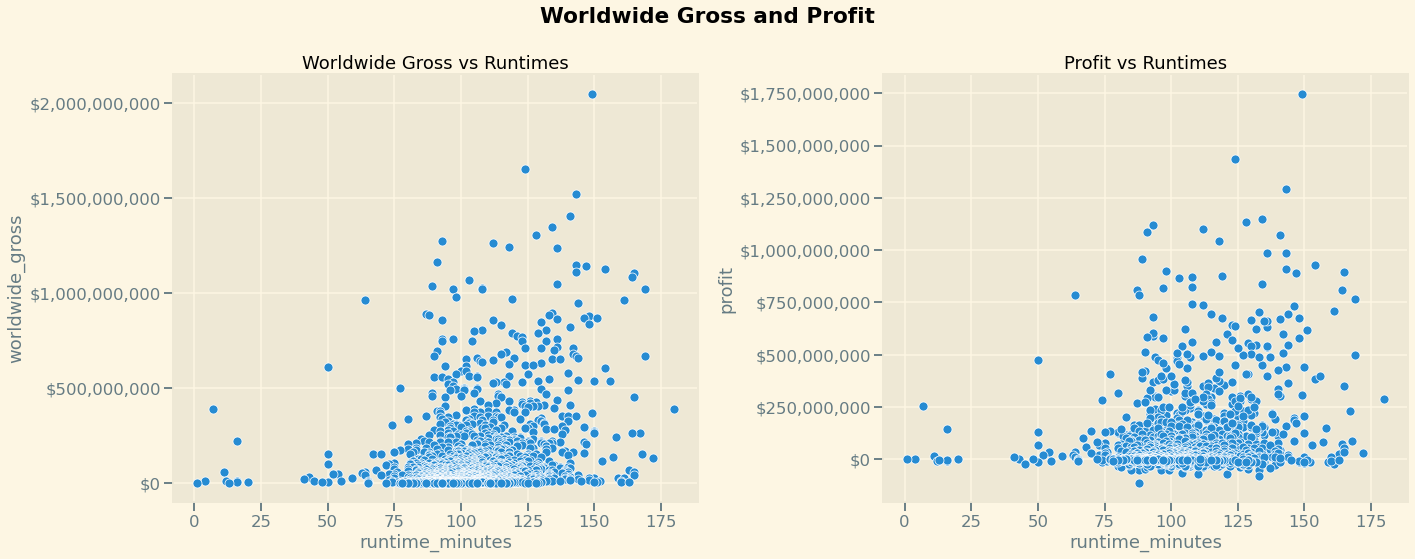

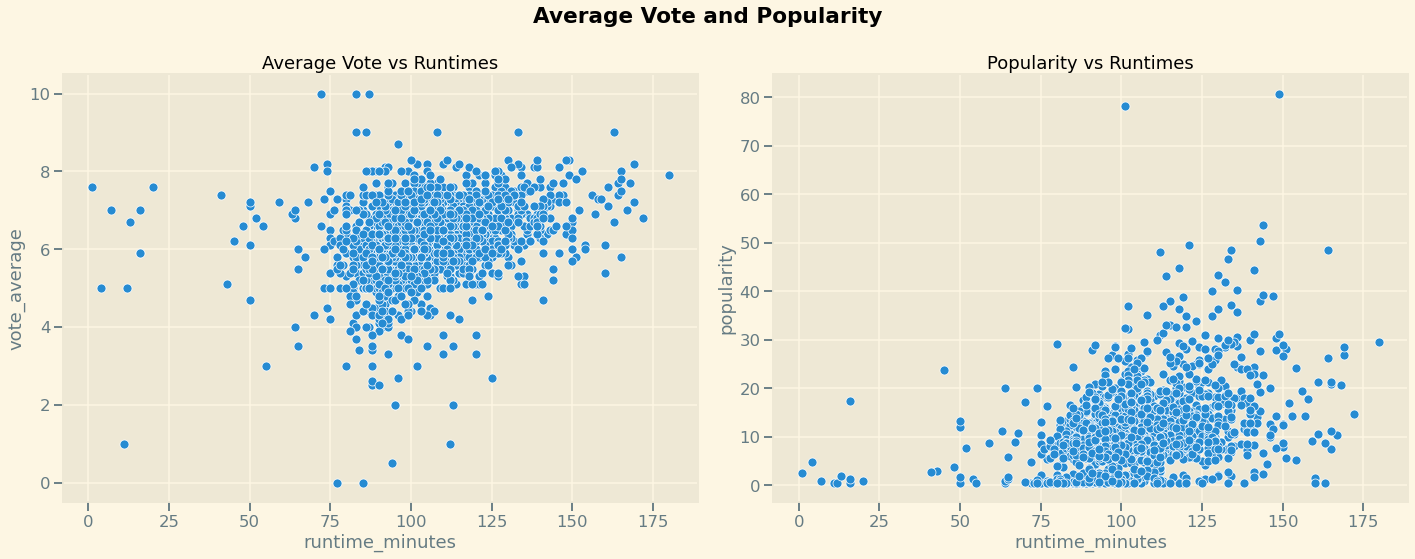

In [267]:
# scatter plot comparison for worldwide grosses and profit vs runtimes
scatterplot_compare_dollars(df3, 'runtime_minutes', 'worldwide_gross', 
                    'Worldwide Gross vs Runtimes',
                    'runtime_minutes', 'profit', 'Profit vs Runtimes',
                    'Worldwide Gross and Profit')

# scatter plot comparison for popularity and average rating vs runtimes
scatterplot_compare(df3, 
                    'runtime_minutes', 'vote_average', 
                    'Average Vote vs Runtimes',
                    'runtime_minutes', 'popularity', 
                    'Popularity vs Runtimes',
                    'Average Vote and Popularity')

In [268]:
# create df including only movies whose worldwide gross is less than 100 million
df3_trunc = df3.loc[df3['worldwide_gross'] < 100000000]
df3_trunc

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,Genres,length,profit
540,insidious,1500000,54009150,99870886,103.0,16.197,6.9,3582,"[Horror, Mystery, Thriller]",medium,98370886
541,alpha,51000000,35851379,99624873,116.0,24.536,5.9,1167,[Crime],medium,48624873
542,justin bieber never say never,13000000,73013910,99034125,105.0,8.602,5.1,240,"[Documentary, Music]",medium,86034125
543,philomena,12000000,37709979,98963392,98.0,8.978,7.4,945,"[Biography, Comedy, Drama]",medium,86963392
544,black mass,53000000,62575678,98837872,123.0,14.646,6.4,2020,"[Biography, Crime, Drama]",long,45837872
...,...,...,...,...,...,...,...,...,...,...,...
1628,born to fly elizabeth streb vs gravity,500000,1822,1822,82.0,0.600,5.5,2,"[Action, Biography, Documentary]",medium,-498178
1629,detention of the dead,500000,1778,1778,87.0,4.268,5.0,50,"[Action, Adventure, Comedy]",medium,-498222
1630,the looking glass,300000,1711,1711,80.0,0.600,5.0,1,[Fantasy],medium,-298289
1631,skin trade,9000000,1242,1242,78.0,9.362,5.6,96,[Documentary],medium,-8998758


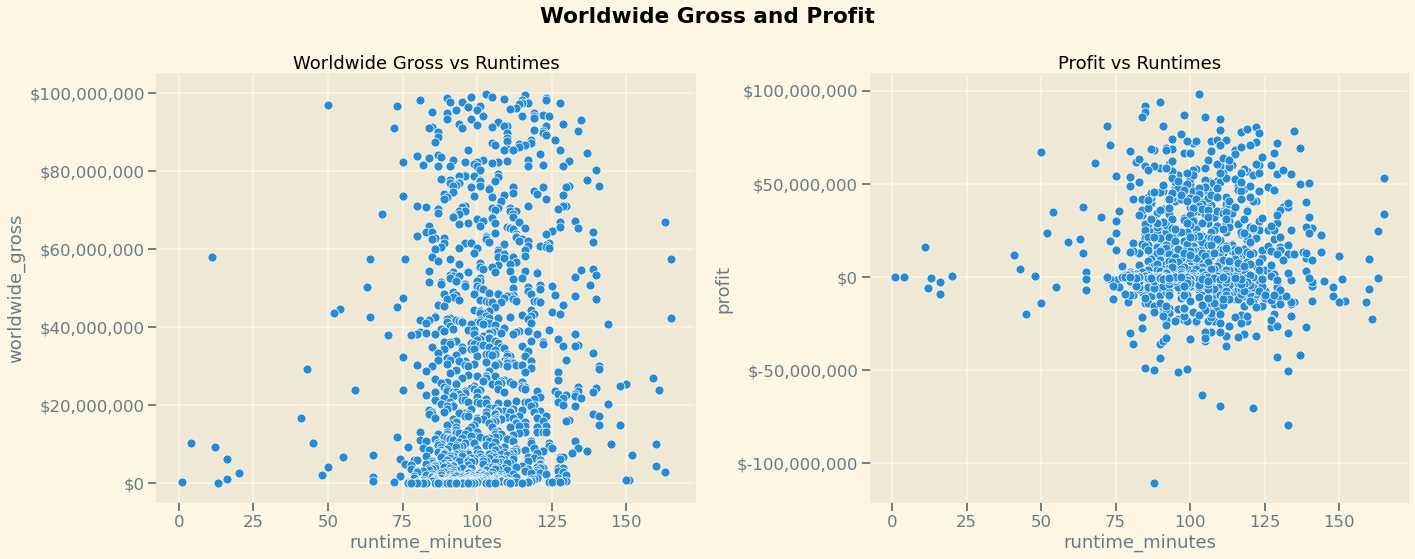

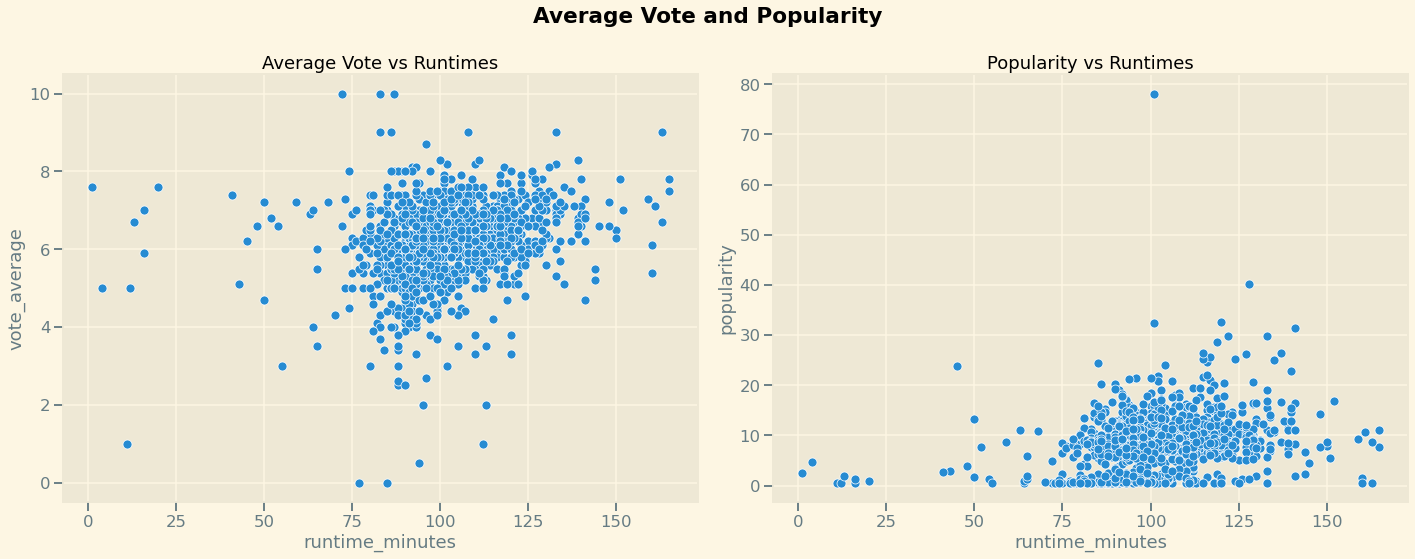

In [269]:
# scatter plot comparison for worldwide grosses and profit vs runtimes
# of new truncated df3
scatterplot_compare_dollars(df3_trunc, 
                            'runtime_minutes', 'worldwide_gross', 
                            'Worldwide Gross vs Runtimes',
                            'runtime_minutes', 'profit', 
                            'Profit vs Runtimes',
                            'Worldwide Gross and Profit')

# scatter plot comparison for popularity and average rating vs runtimes
# of new truncated df3
scatterplot_compare(df3_trunc, 
                    'runtime_minutes', 'vote_average', 
                    'Average Vote vs Runtimes',
                    'runtime_minutes', 'popularity', 
                    'Popularity vs Runtimes',
                    'Average Vote and Popularity')

> There appears to be a weak correlation between a movie's runtime and it's success both financially and in popularity.

> The data shows that movies can be successful over a large range of runtimes with the first cluster starting at about 1 hour and it doesn't start trailing off until just past the 2 hour mark.

> One consideration is that it is rare for movies made to be shorter than 1 hour or longer than 2, this is because these times are already thought of as too short or too long for in relation to story telling in one sitting.

> What the data shows is that there are not huge differences in the amount of success for a movie as long as it stays within the average range of films.

> There is a downward trend of movies as the runtime approaches 2 hours and over.  There are still successes here and that is because most 2.5 hour or more long movies made today are popular franchise films with built in audiences and a certain amount of guaranteed success.  These movies run longer on average 

In [270]:
df3_trunc = df3_trunc[(df3_trunc['runtime_minutes'] >= 80) & 
                      (df3_trunc['runtime_minutes'] <= 130) &
                      (df3_trunc['popularity'] <= 25)]
df3_trunc

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,Genres,length,profit
540,insidious,1500000,54009150,99870886,103.0,16.197,6.9,3582,"[Horror, Mystery, Thriller]",medium,98370886
541,alpha,51000000,35851379,99624873,116.0,24.536,5.9,1167,[Crime],medium,48624873
542,justin bieber never say never,13000000,73013910,99034125,105.0,8.602,5.1,240,"[Documentary, Music]",medium,86034125
543,philomena,12000000,37709979,98963392,98.0,8.978,7.4,945,"[Biography, Comedy, Drama]",medium,86963392
544,black mass,53000000,62575678,98837872,123.0,14.646,6.4,2020,"[Biography, Crime, Drama]",long,45837872
...,...,...,...,...,...,...,...,...,...,...,...
1627,me you and five bucks,1500000,2105,2105,93.0,0.691,7.7,3,"[Comedy, Drama, Romance]",medium,-1497895
1628,born to fly elizabeth streb vs gravity,500000,1822,1822,82.0,0.600,5.5,2,"[Action, Biography, Documentary]",medium,-498178
1629,detention of the dead,500000,1778,1778,87.0,4.268,5.0,50,"[Action, Adventure, Comedy]",medium,-498222
1630,the looking glass,300000,1711,1711,80.0,0.600,5.0,1,[Fantasy],medium,-298289


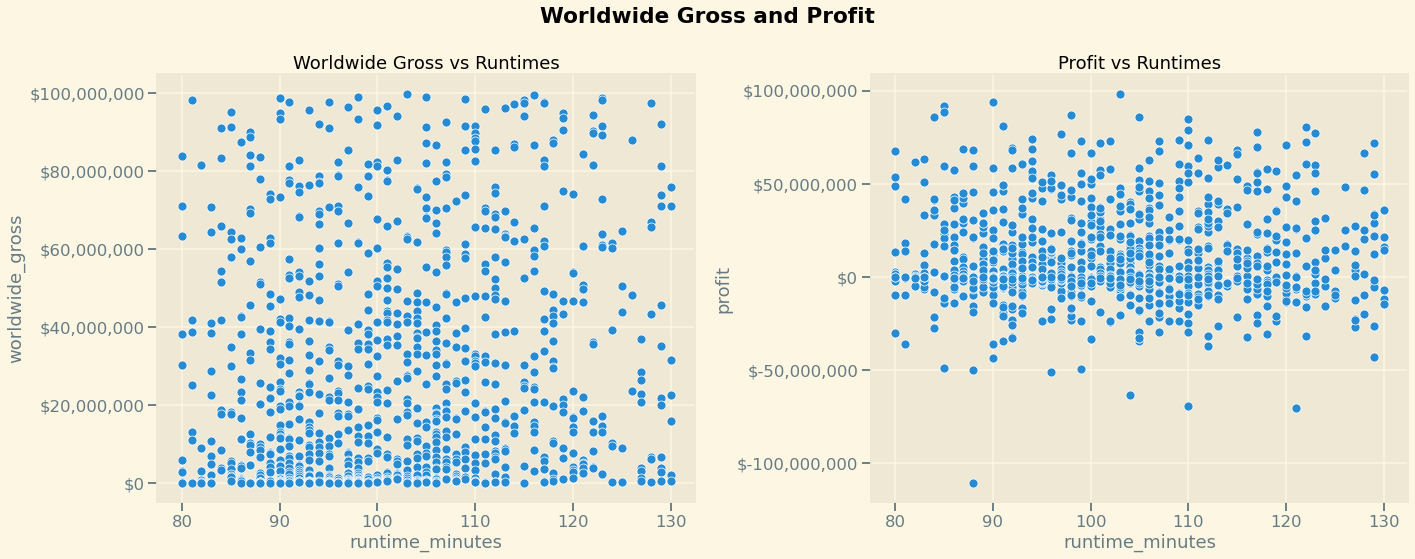

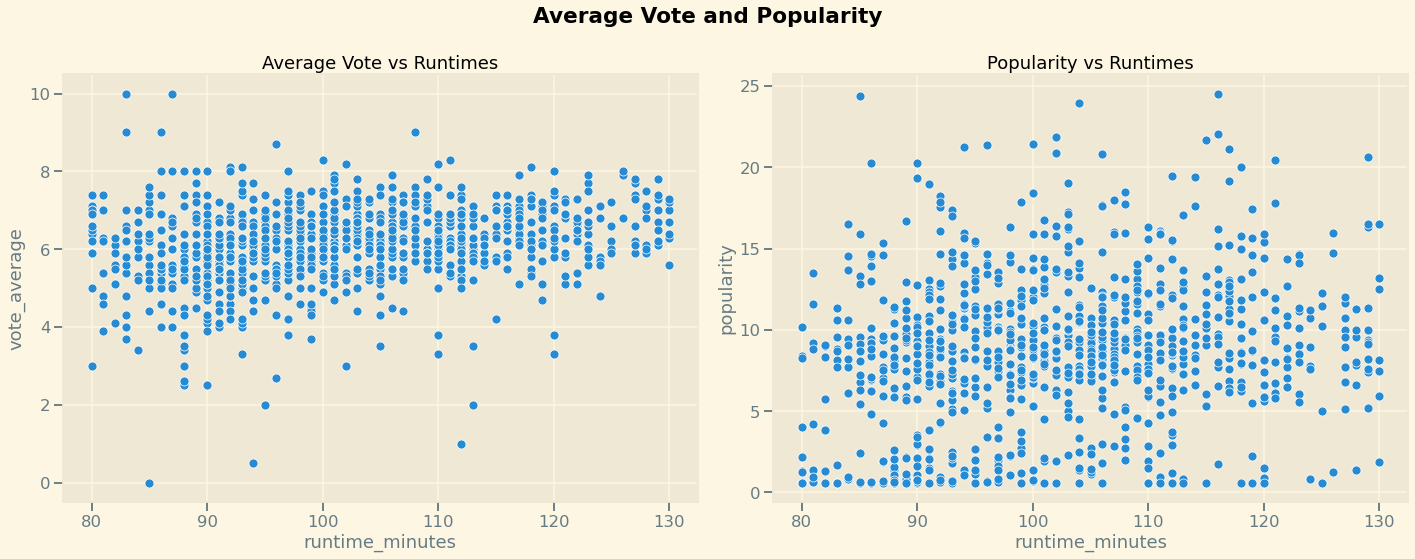

In [271]:
# scatter plot comparison for worldwide grosses and profit vs runtimes
# of further truncated df3
scatterplot_compare_dollars(df3_trunc, 'runtime_minutes', 'worldwide_gross', 
                                            'Worldwide Gross vs Runtimes',
                                            'runtime_minutes', 'profit', 
                                            'Profit vs Runtimes',
                                            'Worldwide Gross and Profit')

# scatter plot comparison for popularity and average rating vs runtimes
# of further truncated df3
scatterplot_compare(df3_trunc, 'runtime_minutes', 'vote_average', 
                                'Average Vote vs Runtimes',
                                'runtime_minutes', 'popularity', 
                                'Popularity vs Runtimes',
                                'Average Vote and Popularity')

In [272]:
# df3_long_movies = df3[df3['runtime_minutes'] > ]
# df3_long_movies.sort_values('runtime_minutes', axis=0, ascending=False)
# #df3 = df3.sort_values('worldwide_gross', axis=0, ascending=False)

> With the outliers removed we can see that both in audience score and gross earnings there isn't much evidence for length playing a large roll in a movie's success.  The distribution of both successes and failures on the given metric is extremely even.

> The evidence we have also shows that there is some loose correlation between length and the and the quality of the product.  We see this because before pairing down the data, we saw that only a small fraction of movies made over decades fell outside of what is considered the movie watching norm, 1.5 to 2.5 hours.  Often movies begin to feel their length after an oddly specific time frame.  There is success to be had in that area.

****

**Recommendation**
> There is a lot of flexibility to work with in the runtime of your movies.

> Focus on story and the quality of the other aspects of your movies.

> There is more to be learned about how small tweaks to a movies runtime might have small benefits that can push a movie in the right direction or help it's momentum.  Specifically within certain genres where running longer might be more felt by the audience or cutting it short left them feeling cheated.

In [273]:
# def hist_compare(df, hist1, hist2, title1, xaxis2, yaxis2, title2, suptitle):
    
#     # set plt style and seaborn context
#     #plt.style.use('Solarize_Light2')
#     #sns.set_context('talk', font_scale=1)
    
#     # create figure and axes
#     fig, axes = plt.subplots(ncols=2, figsize=(20,8))
    
#     # plot scatter 1
#     ax1 = sns.histplot(data=df[hist1], bins='auto', ax=axes[0])
#     ax1.set_title(title1)
    
#     # plot scatter 2
#     ax2 = sns.histplot(data=df, x=xaxis2, y=yaxis2, ax=axes[1])
#     ax2.set_title(title2)
    
#     fig.suptitle(suptitle, color='black', fontweight='bold')
    
#     fig.tight_layout();

## Are online ratings and audience feedback consistent with the financial success of the movie?

In [274]:
def hist_compare(df, hist1, hist2, title1, xaxis2, yaxis2, title2, suptitle):
    
    # set plt style and seaborn context
    #plt.style.use('Solarize_Light2')
    #sns.set_context('talk', font_scale=1)
    
    # create figure and axes
    fig, axes = plt.subplots(ncols=2, figsize=(20,8))
    
    # plot scatter 1
    ax1 = sns.histplot(data=df[hist1], bins='auto', ax=axes[0])
    ax1.set_title(title1)
    
    # plot scatter 2
    ax2 = sns.histplot(data=df, x=xaxis2, y=yaxis2, ax=axes[1])
    ax2.set_title(title2)
    
    fig.suptitle(suptitle, color='black', fontweight='bold')
    
    fig.tight_layout();